In [239]:
# Configurar pandas para mostrar todas las columnas sin truncarlas
pd.set_option('display.max_columns', None)

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Personas en situación migratoria irregular (antes, extranjeros presentados y devueltos)

### Eventos de personas en situación migratoria irregular en México, según entidad federativa y municipio

In [18]:
bd2020 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2020.xlsx')
bd2021 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2021.xlsx')
bd2022 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2022.xlsx')
bd2023 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2023.xlsx')
bd2024 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2024.xlsx')


In [21]:
# Seleccionar solo las columnas necesarias y agregar la columna del año
bd2020 = bd2020[['Entidad Federativa / Municipio', 'Total']]
bd2020['Año'] = 2020

bd2021 = bd2021[['Entidad Federativa / Municipio', 'Total']]
bd2021['Año'] = 2021

bd2022 = bd2022[['Entidad Federativa / Municipio', 'Total']]
bd2022['Año'] = 2022

bd2023 = bd2023[['Entidad Federativa / Municipio', 'Total']]
bd2023['Año'] = 2023

bd2024 = bd2024[['Entidad Federativa / Municipio', 'Total']]
bd2024['Año'] = 2024

# Unir todos los dataframes en uno solo
df_concat = pd.concat([bd2020, bd2021, bd2022, bd2023, bd2024], ignore_index=True)

In [22]:
# Eliminar filas con cualquier valor NaN en el dataframe
df_concat = df_concat.dropna()



  Entidad Federativa / Municipio  Total   Año
1                  Total general  82379  2020
3                 Aguascalientes    116  2020
4           Aguascalientes, Ags.     93  2020
5                 Calvillo, Ags.      1  2020
6                    Cosío, Ags.      4  2020


In [25]:
# Subdataframe con filas que contienen una coma en la columna 'Entidad Federativa / Municipio'
df_mun = df_concat[df_concat['Entidad Federativa / Municipio'].str.contains(',')]

# Subdataframe con filas que no contienen una coma en la columna 'Entidad Federativa / Municipio'
df_edo = df_concat[~df_concat['Entidad Federativa / Municipio'].str.contains(',')]


In [91]:
#df_mun.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\mun2020-2024.csv')

In [28]:
#df_edo.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\edo2020-2024.csv')

In [66]:
# Pivotar el DataFrame
df_pivot = df_mun.pivot_table(index="Municipio", columns="Año", values="Total", fill_value=0).reset_index()

# Ver el DataFrame resultante
print(df_pivot)


Año                        Municipio   2020   2021    2022    2023   2024
0                  Acacoyagua, Chis.    0.0    0.0     0.0     2.0    0.0
1                       Acala, Chis.    0.0    0.0     0.0     0.0    1.0
2    Acambay de Ruíz Castañeda, Méx.    0.0    0.0     0.0     1.0    0.0
3                  Acapetahua, Chis.  257.0    0.0  4572.0  6320.0   85.0
4           Acapulco de Juárez, Gro.   17.0  122.0    36.0    32.0    0.0
..                               ...    ...    ...     ...     ...    ...
648                   Zumpango, Méx.    0.0    8.0     0.0   155.0  947.0
649            Álamo Temapache, Ver.    0.0    0.0     0.0     3.0    0.0
650            Álvaro Obregón, Mich.    0.0    0.0     0.0     1.0    0.0
651        Ángel Albino Corzo, Chis.    0.0    0.0    24.0     0.0    0.0
652                     Ónavas, Son.    0.0    0.0     0.0     0.0   19.0

[653 rows x 6 columns]


In [61]:
# Filtrar top 10 municipios por cada año y mostrarlos
for year in df_pivot.columns[1:]:  # Excluir la columna 'Municipio'
    print(f"Top 10 municipios para el año {year}:")
    top_10 = df_pivot[['Municipio', year]].nlargest(10, year)
    print(top_10)
    print("\n" + "-"*50 + "\n")


Top 10 municipios para el año 2020:
Año                Municipio     2020
404          Reynosa, Tamps.  13285.0
528         Tapachula, Chis.   6260.0
385    Piedras Negras, Coah.   4062.0
6             Acayucan, Ver.   3704.0
521          Suchiate, Chis.   3561.0
213         Hermosillo, Son.   3474.0
371          Palenque, Chis.   3309.0
542          Tenosique, Tab.   2950.0
595      Tuxtla Chico, Chis.   2594.0
596  Tuxtla Gutiérrez, Chis.   1884.0

--------------------------------------------------

Top 10 municipios para el año 2021:
Año                Municipio     2021
564              Tijuana, BC  29615.0
231       Huimanguillo, Tab.  18618.0
404          Reynosa, Tamps.  17304.0
528         Tapachula, Chis.  16334.0
6             Acayucan, Ver.  14530.0
213         Hermosillo, Son.  13995.0
542          Tenosique, Tab.  10718.0
596  Tuxtla Gutiérrez, Chis.  10154.0
371          Palenque, Chis.   8992.0
92              Centro, Tab.   8555.0

--------------------------------------

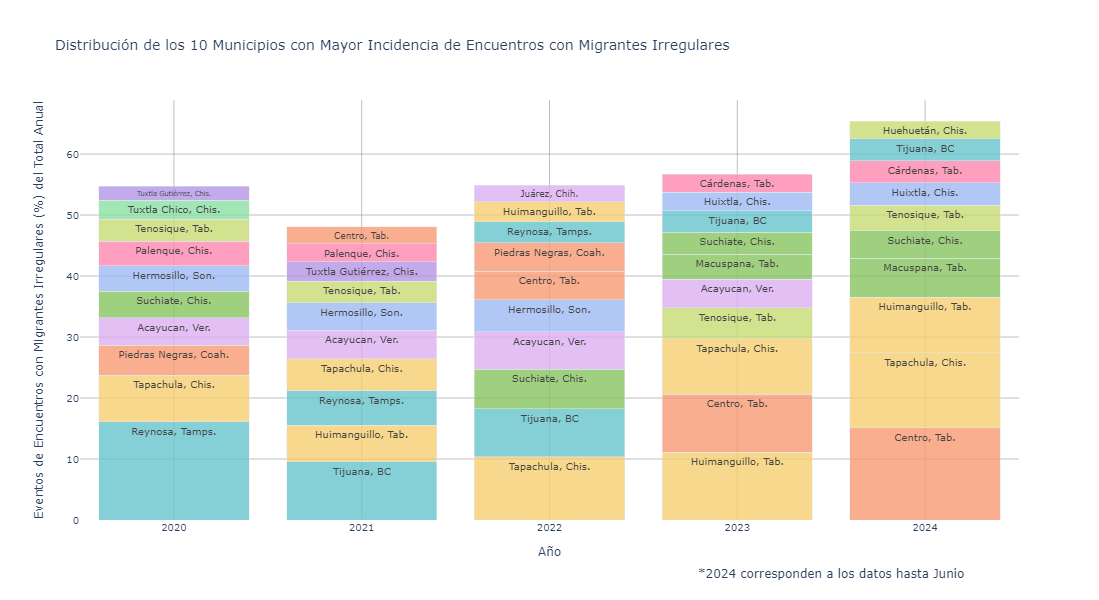

In [92]:
# Crear un DataFrame vacío para almacenar los datos para la gráfica de barras apiladas
stacked_data = pd.DataFrame()

# Calcular el total de cada año para usarlo como denominador en el cálculo de porcentajes
total_por_ano = df_pivot.sum()

# Recorrer cada año y obtener los top 10 municipios
for year in df_pivot.columns[1:]:  # Excluir la columna 'Municipio'
    top_10 = df_pivot[['Municipio', year]].nlargest(10, year)
    top_10 = top_10.set_index('Municipio')
    
    # Calcular el porcentaje del total del año considerando todos los municipios
    top_10_percentage = (top_10 / total_por_ano[year]) * 100
    
    # Ordenar de mayor a menor
    top_10_percentage = top_10_percentage.sort_values(by=year, ascending=False)
    
    # Añadir al DataFrame acumulado
    stacked_data = pd.concat([stacked_data, top_10_percentage.T])

# Convertir el índice de `stacked_data` para asegurarse de que son strings
stacked_data.index = stacked_data.index.map(str)

# Definir una paleta de colores pastel medio transparentes usando rgba
colors = [
    'rgba(102, 197, 204, 0.8)',
    'rgba(246, 207, 113, 0.8)',
    'rgba(248, 156, 116, 0.8)',
    'rgba(220, 176, 242, 0.8)',
    'rgba(135, 197, 95, 0.8)',
    'rgba(158, 185, 243, 0.8)',
    'rgba(254, 136, 177, 0.8)',
    'rgba(201, 219, 116, 0.8)',
    'rgba(139, 224, 164, 0.8)',
    'rgba(180, 151, 231, 0.8)'
]

# Crear un diccionario para mapear cada municipio a un color
municipio_colors = {municipio: colors[i % len(colors)] for i, municipio in enumerate(stacked_data.columns)}

# Crear una figura de barras apiladas
fig = go.Figure()

# Añadir una barra para cada municipio en cada año con etiquetas, asegurando que el orden sea de mayor a menor
for year in stacked_data.index:
    data_year = stacked_data.loc[year].sort_values(ascending=False)  # Ordenar de mayor a menor para cada año
    for municipio in data_year.index:
        fig.add_trace(go.Bar(
            x=[year],  # Usar lista para asegurar que sea un solo valor por año
            y=[data_year[municipio]],
            name=municipio,
            text=municipio,  # Añadir el nombre del municipio como texto
            textposition='inside',  # Posicionar el texto dentro de las barras
            hoverinfo='y+text',
            marker_color=municipio_colors[municipio]  # Asignar color pastel medio transparente
        ))

# Configurar el layout de la gráfica
fig.update_layout(
    barmode='stack',
    title="Distribución de los 10 Municipios con Mayor Incidencia de Encuentros con Migrantes Irregulares",
    xaxis_title="Año",
    yaxis_title="Eventos de Encuentros con Migrantes Irregulares (%) del Total Anual",font=dict(size=10),
    showlegend=False,  # Quitar la leyenda
    width=1000,
    height=600,
    plot_bgcolor='white',  # Fondo blanco
    xaxis=dict(
        showgrid=True, 
        gridcolor='rgba(128, 128, 128, 0.5)'  # Líneas de cuadrícula grises semitransparentes
    ),
    yaxis=dict(
        showgrid=True, 
        gridcolor='rgba(128, 128, 128, 0.5)'  # Líneas de cuadrícula grises semitransparentes
    ),
    annotations=[  # Añadir la anotación personalizada
        dict(
            x=0.8,
            y=-0.15,
            xref='paper',
            yref='paper',
            text='*2024 corresponden a los datos hasta Junio',
            showarrow=False,
            font=dict(size=12),
            xanchor='center'
        )
    ]
)

#fig.show()


### Eventos de personas en situación migratoria irregular en México, según continente y país de nacionalidad.

In [105]:
nac2024 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos_Nacionalidad\\nac2024.xlsx')
nac2023 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos_Nacionalidad\\nac2023.xlsx')
nac2022 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos_Nacionalidad\\nac2022.xlsx')
nac2021 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos_Nacionalidad\\nac2021.xlsx')
nac2020 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos_Nacionalidad\\nac2020.xlsx')


In [107]:
nac2024 = nac2024.dropna()
nac2023 = nac2023.dropna()
nac2022 = nac2022.dropna()
nac2021 = nac2021.dropna()
nac2020 = nac2020.dropna()


In [112]:
nac2024.rename(columns={'Total': 'Total_2024'}, inplace=True)
nac2023.rename(columns={'Total': 'Total_2023'}, inplace=True)
nac2022.rename(columns={'Total': 'Total_2022'}, inplace=True)
nac2021.rename(columns={'Total': 'Total_2021'}, inplace=True)
nac2020.rename(columns={'Total': 'Total_2020'}, inplace=True)

nac_total = nac2024.merge(nac2023, on='Pais', how='outer') \
                   .merge(nac2022, on='Pais', how='outer') \
                   .merge(nac2021, on='Pais', how='outer') \
                   .merge(nac2020, on='Pais', how='outer')

nac_total.fillna(0, inplace=True)


C:\Users\puria\AppData\Local\Temp\ipykernel_1568\2220895957.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\2220895957.py:12: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [153]:
nac_total = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos_Nacionalidad\\nac_total.xlsx')


In [154]:
nac_total

,Unnamed: 0,Pais,Total_2024,Total_2023,Total_2022,Total_2021,Total_2020
0,0,Afganistán,1777,2641,1017,19,0
1,1,Albania,43,32,3,1,2
2,2,Alemania,15,130,30,18,4
3,3,América (Continente),644353,671574,422335,304613,81337
4,4,América Central (Region),206440,245546,209491,249749,76295
...,...,...,...,...,...,...,...
177,177,Vietnam,758,505,26,2,1
178,178,Yemen,49,71,12,20,10
179,179,Zambia,5,4,2,0,0
180,180,Zimbabue,37,13,3,2,0


In [155]:
nac_total['Total2020_2023'] = nac_total['Total_2023'] + nac_total['Total_2021'] + nac_total['Total_2020']

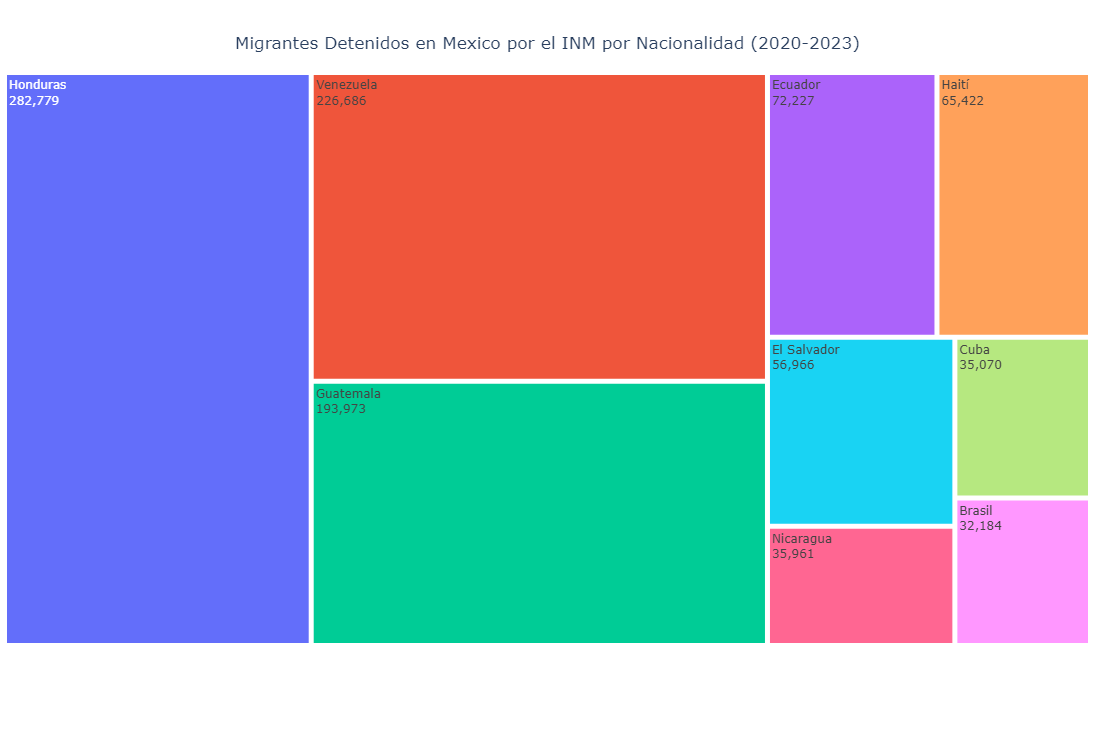

In [159]:
import plotly.graph_objects as go

# Filtramos el DataFrame para eliminar las filas que contienen '()' en la columna 'Pais'
filtered_df = nac_total[~nac_total['Pais'].str.contains(r'\(.*\)', regex=True)]

# Seleccionamos las top 9 filas según la columna 'Total2020_2024'
top9_df = filtered_df.nlargest(9, 'Total2020_2023')

# Calculamos la suma de las demás filas para el grupo "Otros"
otros_total = filtered_df[~filtered_df['Pais'].isin(top9_df['Pais'])]['Total2020_2023'].sum()

# Añadimos la fila 'Otros' al DataFrame
otros_df = pd.DataFrame({'Pais': ['Otros'], 'Total2020_2024': [otros_total]})
final_df = pd.concat([top9_df, otros_df], ignore_index=True)

# Creamos el Treemap con ajustes estéticos
fig = go.Figure(go.Treemap(
    labels=final_df['Pais'],
    parents=[''] * len(final_df),
    values=final_df['Total2020_2023'],
    textinfo="label+value",
    marker=dict(
        line=dict(width=2, color='white')  # Agrega un contorno blanco
    )
))


# Ajustamos el layout para hacerlo más cuadrado, agregamos un título y una leyenda
fig.update_layout(
    width=700,
    height=750,  # Aumentamos la altura para dar espacio a la leyenda
    title={
        'text': "Migrantes Detenidos en Mexico por el INM por Nacionalidad (2020-2023)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',

    },
    margin=dict(l=0, r=0, t=50, b=100),  # Dejamos espacio en el margen inferior para la leyenda
    annotations=[
        dict(
            text="",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.3, y=-0.02,
            xanchor='center', yanchor='top',
            font=dict(size=12)
        )
    ]
)

# Mostramos el Treemap
fig.show()

### Nationwide Encounters U.S. Border Patrol

Encounter data includes  Title 8 apprehensions, Office of Field Operations Title 8 inadmissibles, and all Title 42 expulsions for fiscal years 2020 to date. Data is available for the Northern Land Border, Southwest Land Border, and Nationwide (i.e., air, land, and sea modes of transportation) encounters.

In [165]:
ncbo20_23 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\2. CBO_Southwest_land_border_events\\cbo20-23.xlsx')


In [431]:
ncbo20_23.head(60)

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
0,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,BRAZIL,Title 8,Inadmissibles,3
1,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,CANADA,Title 8,Inadmissibles,1
2,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,CANADA,Title 42,Expulsions,2
3,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,CANADA,Title 8,Inadmissibles,239
4,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 42,Expulsions,1
5,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,Inadmissibles,0
6,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,OTHER,Title 42,Expulsions,1
7,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,OTHER,Title 8,Inadmissibles,6
8,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,PHILIPPINES,Title 8,Inadmissibles,1
9,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,RUSSIA,Title 8,Inadmissibles,1


In [432]:
# Filtrar las filas donde 'Demographic' es 'UC / Single Minors' o 'Accompanied Minors'
filtro_combined = ncbo20_23['Demographic'].isin(['UC / Single Minors', 'Accompanied Minors'])

# Calcular el total de 'Encounter Count'
total_encounters = ncbo20_23['Encounter Count'].sum()

# Calcular el total de 'Encounter Count' para el filtro combinado
total_filtro_combined = ncbo20_23.loc[filtro_combined, 'Encounter Count'].sum()

# Calcular el porcentaje del total
porcentaje_combined = (total_filtro_combined / total_encounters) * 100

# Mostrar el resultado
print(f"Porcentaje combinado (UC / Single Minors y Accompanied Minors): {porcentaje_combined:.2f}%")



Porcentaje combinado (UC / Single Minors y Accompanied Minors): 5.72%


In [433]:
# Filtrar y calcular para 'UC / Single Minors'
filtro_uc = ncbo20_23['Demographic'] == 'UC / Single Minors'
total_uc = ncbo20_23.loc[filtro_uc, 'Encounter Count'].sum()
porcentaje_uc = (total_uc / total_encounters) * 100

# Filtrar y calcular para 'Accompanied Minors'
filtro_accompanied = ncbo20_23['Demographic'] == 'Accompanied Minors'
total_accompanied = ncbo20_23.loc[filtro_accompanied, 'Encounter Count'].sum()
porcentaje_accompanied = (total_accompanied / total_encounters) * 100

# Mostrar los resultados
print(f"Porcentaje (UC / Single Minors): {porcentaje_uc:.2f}%")
print(f"Porcentaje (Accompanied Minors): {porcentaje_accompanied:.2f}%")


Porcentaje (UC / Single Minors): 5.52%
Porcentaje (Accompanied Minors): 0.20%


In [436]:
# Filtrar y calcular el total de 'Encounter Count' para 'UC / Single Minors'
filtro_uc = ncbo20_23['Demographic'] == 'UC / Single Minors'
total_uc = ncbo20_23.loc[filtro_uc, 'Encounter Count'].sum()

# Mostrar el total
print(f"Total 'Encounter Count' para 'UC / Single Minors': {total_uc}")

# Filtrar y calcular el total de 'Encounter Count' para 'Accompanied Minors'
filtro_accompanied = ncbo20_23['Demographic'] == 'Accompanied Minors'
total_accompanied = ncbo20_23.loc[filtro_accompanied, 'Encounter Count'].sum()

# Mostrar el total
print(f"Total 'Encounter Count' para 'Accompanied Minors': {total_accompanied}")

# Filtrar y calcular el total de 'Encounter Count' combinado para ambos grupos
filtro_combined = ncbo20_23['Demographic'].isin(['UC / Single Minors', 'Accompanied Minors'])
total_combined = ncbo20_23.loc[filtro_combined, 'Encounter Count'].sum()

# Mostrar el total combinado
print(f"Total 'Encounter Count' combinado para ambos grupos: {total_combined}")


Total 'Encounter Count' para 'UC / Single Minors': 472973
Total 'Encounter Count' para 'Accompanied Minors': 17435
Total 'Encounter Count' combinado para ambos grupos: 490408


In [435]:
# Agrupamos por 'Citizenship' y sumamos los valores de 'Encounter Count'
sub_df = ncbo20_23.groupby('Citizenship', as_index=False)['Encounter Count'].sum()

# Convertimos los nombres de 'Citizenship' a mayúscula inicial y minúsculas en el resto
sub_df['Citizenship'] = sub_df['Citizenship'].str.capitalize()

# Ordenamos el DataFrame por 'Encounter Count' de mayor a menor y seleccionamos el top 9
top9_df = sub_df.nlargest(10, 'Encounter Count')

# Calculamos la suma de las demás filas para el grupo "Otros"
#otros_total = sub_df[~sub_df['Citizenship'].isin(top9_df['Citizenship'])]['Encounter Count'].sum()

# Añadimos la fila 'Otros' al DataFrame
#otros_df = pd.DataFrame({'Citizenship': ['Otros'], 'Encounter Count': [otros_total]})
final_df = pd.concat([top9_df], ignore_index=True)

# Mostramos el DataFrame resultante
final_df




,Citizenship,Encounter Count
0,Mexico,2542963
1,Honduras,795509
2,Guatemala,788637
3,Venezuela,579453
4,Other,541733
5,Cuba,478212
6,Nicaragua,357215
7,Colombia,311622
8,El salvador,277819
9,Haiti,274395


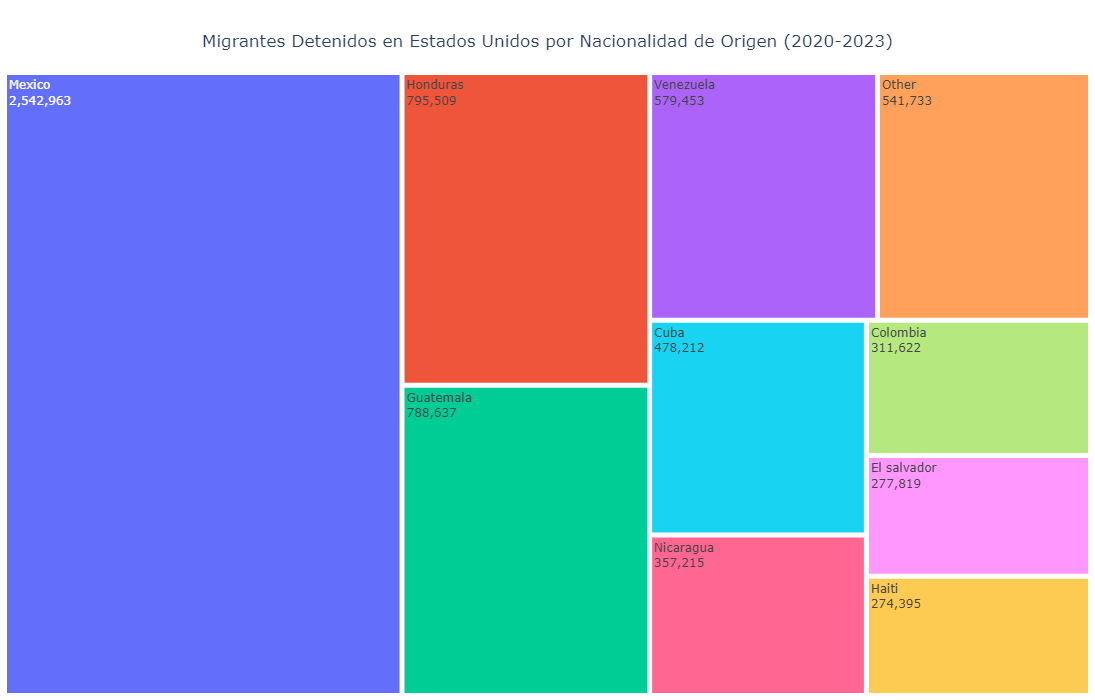

In [170]:
# Creamos el Treemap con ajustes estéticos
fig = go.Figure(go.Treemap(
    labels=final_df['Citizenship'],
    parents=[''] * len(final_df),
    values=final_df['Encounter Count'],
    textinfo="label+value",
    marker=dict(
        line=dict(width=2, color='white')  # Agrega un contorno blanco
    )
))

# Ajustamos el layout para hacerlo más cuadrado y agregamos un título
fig.update_layout(
    width=700,
    height=700,  # Ajustamos la altura a un valor más cuadrado
    title={
        'text': "Migrantes Detenidos en Estados Unidos por Nacionalidad de Origen (2020-2023)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=0, r=0, t=50, b=0)  # Ajustamos los márgenes, eliminando espacio para la leyenda
)

# Mostramos el Treemap
fig.show()


## EMIF Sur Colef

1	Guatemala
2	Honduras
3	El Salvador
4	México
5	Estados Unidos
6	Anguila
7	Antigua y Barbuda
8	Antillas Neerlandesas (Holandesas)
9	Argentina
10	Aruba
11	Belice
12	Bolivia
13	Brasil
14	Canadá
15	Chile
16	Colombia
17	Costa Rica
18	Cuba
19	Ecuador
22	Groenlandia
24	Guyana Francesa
25	Guyana Inglesa
26	Haití
28	Isla de Jamaica
29	Isla de Martinica
30	Isla Dominica
31	Isla Granada
32	Isla Monserrat
33	Isla Santa Lucia
34	Islas Bahamas
35	Islas Barbados
36	Islas Bermudas
37	Islas Caimán
38	Islas Guadalupe
39	Islas San Cristóbal y Nieves
40	Islas San Pedro Miguelón
41	Islas San Vicente y las Granadinas
42	Islas Turcas y Caicos
43	Islas Vírgenes (Británicas)
44	Islas Vírgenes (estadounidenses)
45	Malvinas
47	Nicaragua
48	Panamá
49	Paraguay
50	Perú
51	Puerto Rico
52	República Dominicana
53	Surinam
54	Trinidad y Tobago
55	Uruguay
56	Venezuela
57	Otro país no especificado anterior


%%%%%%%%%%%

1	Hombre
2	Mujer
mente
97	No sabe
98	No responde
99	No especificado


In [212]:
# Diccionario que mapea los valores de p10p a los nombres de los países
mapping = {
    1: "Guatemala",
    2: "Honduras",
    3: "El Salvador",
    4: "México",
    5: "Estados Unidos",
    6: "Anguila",
    7: "Antigua y Barbuda",
    8: "Antillas Neerlandesas (Holandesas)",
    9: "Argentina",
    10: "Aruba",
    11: "Belice",
    12: "Bolivia",
    13: "Brasil",
    14: "Canadá",
    15: "Chile",
    16: "Colombia",
    17: "Costa Rica",
    18: "Cuba",
    19: "Ecuador",
    22: "Groenlandia",
    24: "Guyana Francesa",
    25: "Guyana Inglesa",
    26: "Haití",
    28: "Isla de Jamaica",
    29: "Isla de Martinica",
    30: "Isla Dominica",
    31: "Isla Granada",
    32: "Isla Monserrat",
    33: "Isla Santa Lucia",
    34: "Islas Bahamas",
    35: "Islas Barbados",
    36: "Islas Bermudas",
    37: "Islas Caimán",
    38: "Islas Guadalupe",
    39: "Islas San Cristóbal y Nieves",
    40: "Islas San Pedro Miguelón",
    41: "Islas San Vicente y las Granadinas",
    42: "Islas Turcas y Caicos",
    43: "Islas Vírgenes (Británicas)",
    44: "Islas Vírgenes (estadounidenses)",
    45: "Malvinas",
    47: "Nicaragua",
    48: "Panamá",
    49: "Paraguay",
    50: "Perú",
    51: "Puerto Rico",
    52: "República Dominicana",
    53: "Surinam",
    54: "Trinidad y Tobago",
    55: "Uruguay",
    56: "Venezuela",
    57: "Otro país no especificado anteriormente",
    97: "No sabe",
    98: "No responde",
    99: "No especificado"
}

In [211]:
mapping_sex = {
    1: "Hombre",
    2: "Mujer"
}

###  Flujo de Migrantes Devueltos por las Autoridades Migratorias de Estados Unidos

In [232]:
guate1 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DEUAGT2022_1.csv')
guate2 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DEUAGT2022_2.csv')
hon1 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DEUAHN_1.csv')
hon2 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DEUAHN_2.csv')
salv1 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DEUASV_1.csv')
salv2 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DEUASV_2.csv')


In [233]:
# Añadimos una columna 'Source' a cada DataFrame para indicar su origen
guate1['Source'] = 'guate1'
guate2['Source'] = 'guate2'
hon1['Source'] = 'hon1'
hon2['Source'] = 'hon2'
salv1['Source'] = 'salv1'
salv2['Source'] = 'salv2'

# Unimos todos los DataFrames en uno solo
df_unido = pd.concat([guate1, guate2, hon1, hon2, salv1, salv2], ignore_index=True)


In [234]:
df_unido.head(1)

,folio,trim,unidad,ciudad,punto,turno,sexo,edad,pasmex,p1a,p1n,p2,p3,p3_1,p4,p4_1,p5,p6,p6_1,p7,p7_1_1,p7_1_2,p7_1_3,p7_2,p7_3,p7_4_1,p7_4_2,p7_4_3,p7_4_4,p7_5,p7_5_1,p7_5_2,p7_5_2_1,p8,p9_1,p9_2,p9_3,p9_4,p10p,p10_1d,p10_1m,p10_1u,p11p,p11_1d,p11_1m,p11_1u,p11_2e,p11_2m,p11_2l,p11_2u,p11_3es,p11_3cn,p11_3cd,p12c,p12t,p13,p13_1,p13_2,p13_2_1,p13_4,p13_5,p13_6_1,p13_6_2,p13_6_3,p13_6_4,p13_6_5,p13_6_6,p13_6_7,p13_6_8,p13_7,p13_8,p13_9c,p13_9u,p13_9t,p13_10,p13_11,p13_12,p13_13_1,p13_13_2,p13_14,p14,p14_1,p15,p16,p16_1,p17,p17_1c,p17_1u,p18_0_1,p18_0_2,p18_0_3,p18_0_4,p18_0_5,p18_1,p18_2,p19_1e,p19_1l,p19_1u,p19_2e,p19_2l,p19_2u,p20e,p20l,p20u,p21c,p21t,p22,p22_1e,p22_1m,p22_1l,p22_1u,p22_3,p22_4,p23_1,p23_2,p23_3,p23_4,p23_5,p23_6,p24_0_1,p24_0_2,p24_0_3,p24_0_4,p24_1,p25,p25_1_1,p25_1_2,p25_1_3,p25_1_4,p25_1_5,p25_1_6,p25_1_7,p25_1_8,p25_2,p26,p26_1c,p26_1t,p26_2,p26_3,p27,p27_1c,p27_1u,p27_1_1,p27_2,p28c,p28u,p28_1,p29_0_1,p29_0_2,p29_0_3,p29_0_4,p29_0_5,p29_1,p29_2,p30,p31,p31_1,p31_2,p32,p32_1,p33,p33_1,p33_1_1,p33_1_2,p34,p35es,p35cn,p35cd,p35_1,p35_1_1,p35_2,p35_2_1_1,p35_2_1_2,p35_2_1_3,p35_2_1_4,p35_2_1_5,p35_2_1_6,p35_2_2,p35_2_3_1,p35_2_3_2,p35_2_3_3,p35_3_1,p35_3_2,p35_3_3,p35_3_4,p35_4c,p35_4t,p35_5,p35_6,p35_7,p35_8,p35_9,p35_9_1,p36es,p36cn,p36cd,p37c,p37t,p38,p38_2,p38_2_1,p38_2_2,p38_3c,p38_3u,p38_3t,p38_4,p38_5,p39,p39_1,p39_2_1,p39_2_2,p40,p41,p42,p43,p43_1,p43_2,p44,p44_1,p45,p46m,p46a,p47,p48,p48_1,p49,p50,p50_1,nivel,oficio_res,filtro,estrato,upm,ponfin3,Source,Folio
0,1308.0,3,22208,1,1,1,1,18,1,6,1,1,2,2,6,2,6,2,2,2,0,2,0,2,2,1,0,0,0,-5,-5,-5,-5,-5,2,2,2,2,1,1,101,2,1,1,101,2,-13,-13,-13,-13,-13,-13,-13,777,7,2,2,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,1,2,1,2,2,1,1217001,0,2,-20,2,-21,-21,1,2,2,2,2,-22,-22,7,999999999,99,99,999999999,99,8,999999999,99,52,2,2,-23,-23,-23,-23,-23,-23,1,2,2,2,2,2,1,1,1,1,6,2,-25,-25,-25,-25,-25,-25,-25,-25,-25,80410082,45,2,1,5,2,-28,-28,-28,-28,0,0,-30,1,2,2,2,2,-31,-31,0,2,2,-32,2,-33,0,-34,-34,-34,-34,48,48141,4814134832,3,1,3,2,2,2,2,1,1,3,-37,-37,-37,2,2,2,2,7,2,2,2,2,4,2,-38,48,48141,4814134832,7,2,2,-41,-41,-41,-41,-41,-41,-41,2,99,99999,99,99,2,0,-43,-43,-43,-43,1,-46,-46,7,2022,0,0,-49,1,-50,-50,2,0,1,1011.0,1.011022e+09,60.126369,guate1,NaN


In [235]:
DevueltosUSA = df_unido[['sexo','edad','p10p']]

In [237]:
# Aplicamos el mapeo
DevueltosUSA ['p10p'] = DevueltosUSA ['p10p'].map(mapping)
DevueltosUSA ['sexo'] = DevueltosUSA ['sexo'].map(mapping_sex)

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\1998966251.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\1998966251.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [243]:
# Cambiamos el nombre de la columna 'p10p' a 'pais'
DevueltosUSA.rename(columns={'p10p': 'pais'}, inplace=True)
DevueltosUSA.head()


C:\Users\puria\AppData\Local\Temp\ipykernel_1568\2887052516.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sexo,edad,pais
0,Hombre,18,Guatemala
1,Mujer,20,Guatemala
2,Mujer,25,Guatemala
3,Mujer,24,Guatemala
4,Hombre,35,Guatemala


#### 30. Principalmente, ¿qué medio de transporte utilizó en este último viaje para cruzar la frontera México-Estados Unidos?

df_unido['p30']
-998	Abandonó la encuesta
0	Ninguno (caminando o nadando)
1	Balsas (cámaras de llanta, tambos, maderos)
2	Autobús o camioneta
3	Automóvil particular
4	Tráiler o camión de carga
5	Lancha o embarcación en el mar o río
6	Avión
7	Otro
97	No sabe
98	No responde
99	No especificado



df_unido['p15']
#### 15. Principalmente, ¿qué medio de transporte utilizó en este último viaje para cruzar la frontera Guatemala-México?.
-998	Abandonó la encuesta
-19	Cuando entró a México fue por avión o por mar
0	Ninguno (caminando o nadando)
1	Balsas (cámaras de llanta, tambos, maderos)
2	Triciclo/ Tuc Tuc/ Bicicleta
3	Autobús o camioneta
4	Automóvil/Motocicleta
5	Tráiler o camión de carga
6	Lancha o embarcación en el río
7	Otro
97	No sabe
98	No responde
99	No especificado

In [350]:
# Diccionario para mapear df_unido['p30']
mapping_p30 = {
    -998: 'Abandonó la encuesta',
    0: 'Ninguno (caminando o nadando)',
    1: 'Balsas (cámaras de llanta, tambos, maderos)',
    2: 'Autobús o camioneta',
    3: 'Automóvil particular',
    4: 'Tráiler o camión de carga',
    5: 'Lancha o embarcación en el mar o río',
    6: 'Avión',
    7: 'Otro',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
}

# Diccionario para mapear df_unido['p15']
mapping_p15 = {
    -998: 'Abandonó la encuesta',
    -19: 'Cuando entró a México fue por avión o por mar',
    0: 'Ninguno (caminando o nadando)',
    1: 'Balsas (cámaras de llanta, tambos, maderos)',
    2: 'Triciclo/ Tuc Tuc/ Bicicleta',
    3: 'Autobús o camioneta',
    4: 'Automóvil/Motocicleta',
    5: 'Tráiler o camión de carga',
    6: 'Lancha o embarcación en el río',
    7: 'Otro',
    97: 'No sabe',
    98: 'No responde'
}


In [352]:
# Mapear las columnas p30 y p15
df_unido['p30_mapeado'] = df_unido['p30'].map(mapping_p30)
df_unido['p15_mapeado'] = df_unido['p15'].map(mapping_p15)



C:\Users\puria\AppData\Local\Temp\ipykernel_1568\605446166.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\605446166.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [353]:
# Crear un subdataframe solo con las columnas mapeadas
sub_df = df_unido[['p30_mapeado', 'p15_mapeado']]

# Mostrar las primeras filas del subdataframe
sub_df.head()


,p30_mapeado,p15_mapeado
0,Ninguno (caminando o nadando),Ninguno (caminando o nadando)
1,Ninguno (caminando o nadando),Autobús o camioneta
2,Abandonó la encuesta,Ninguno (caminando o nadando)
3,Ninguno (caminando o nadando),Autobús o camioneta
4,Ninguno (caminando o nadando),Ninguno (caminando o nadando)


#### 23. ¿Para llegar a la frontera de México-Estados Unidos utilizó

df_unido[p23_1	p23_2	p23_3	p23_4	p23_5	p23_6]
-998	Abandonó la encuesta
1	Sí
2	No
97	No sabe
98	No responde
99	No especificado


In [362]:
# Diccionario para mapear las columnas p23_1 a p23_6
mapping_p23 = {
    -998: 'Abandonó la encuesta',
    1: 'Sí',
    2: 'No',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
}


In [365]:
# Renombrar las columnas de acuerdo a las descripciones
df_unido.rename(columns={
    'p23_1_mapeado': 'autobús o camioneta',
    'p23_2_mapeado': 'ferrocarril',
    'p23_3_mapeado': 'tráiler o camión de carga',
    'p23_4_mapeado': 'automóvil o motocicleta',
    'p23_5_mapeado': 'avión',
    'p23_6_mapeado': 'otro'
}, inplace=True)


In [363]:
# Mapear las columnas p23_1 a p23_6
df_unido['p23_1_mapeado'] = df_unido['p23_1'].map(mapping_p23)
df_unido['p23_2_mapeado'] = df_unido['p23_2'].map(mapping_p23)
df_unido['p23_3_mapeado'] = df_unido['p23_3'].map(mapping_p23)
df_unido['p23_4_mapeado'] = df_unido['p23_4'].map(mapping_p23)
df_unido['p23_5_mapeado'] = df_unido['p23_5'].map(mapping_p23)
df_unido['p23_6_mapeado'] = df_unido['p23_6'].map(mapping_p23)


C:\Users\puria\AppData\Local\Temp\ipykernel_1568\1548798441.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\1548798441.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\1548798441.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [389]:
# Crear un subdataframe con los nuevos nombres de las columnas
sub_df_p23_renombrado = df_unido[['autobús o camioneta', 'ferrocarril', 'tráiler o camión de carga', 'automóvil o motocicleta', 'avión', 'otro']]

# Mostrar las primeras filas del subdataframe
sub_df_p23_renombrado.head()


KeyError: "['autobús o camioneta', 'tráiler o camión de carga', 'automóvil o motocicleta', 'avión'] not in index"

In [391]:
# Mostrar las primeras filas del subdataframe
sub_df_p23_renombrado.tail()

,autobus o camioneta,ferrocarril,trailer o camion de carga,automovil o motocicleta,avion,otro
774,Si,No,Si,No,No,No
775,Si,No,No,No,No,No
776,Si,No,No,No,No,No
777,Si,No,No,No,No,No
778,Si,No,Si,No,No,No


### Flujo de Migrantes Devueltos por las Autoridades Migratorias de México

In [188]:
guate12 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DMXGT1.csv')
guate22 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DMXGT2.csv')
hon12 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DMXHN1.csv')
hon22 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DMXHN2.csv')
salv12 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DMXSV1.csv')
salv22 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\DMXSV2.csv')

In [189]:
# Añadimos una columna 'Source' a cada DataFrame para indicar su origen
guate12['Source'] = 'guate12'
guate22['Source'] = 'guate22'
hon12['Source'] = 'hon12'
hon22['Source'] = 'hon22'
salv12['Source'] = 'salv12'
salv22['Source'] = 'salv22'

df_unido2 = pd.concat([guate12, guate22, hon12, hon22, salv12, salv22], ignore_index=True)

In [349]:
df_unido2.head(10)

,folio,trim,unidad,ciudad,punto,turno,p1,p2,p3a,p3n,p4,p5,p5_1,p6,p6_1,p7,p8,p8_1,p9,p9_1_1,p9_1_2,p9_1_3,p9_2,p9_3,p9_4_1,p9_4_2,p9_4_3,p9_4_4,p9_5_1,p9_5_2,p9_5_3,p9_5_4,p10p,p10_1d,p10_1m,p10_1u,p11p,p11_1d,p11_1m,p11_1u,p11_2e,p11_2m,p11_2l,p11_2u,p11_3es,p11_3cn,p11_4c,p11_4t,p12,p12_1,p12_2,p12_2_1,p12_4,p12_5,p12_6_1,p12_6_2,p12_6_3,p12_6_4,p12_6_5,p12_6_6,p12_6_7,p12_6_8,p12_7,p12_8,p12_9c,p12_9u,p12_9t,p12_10,p12_11,p12_12,p12_13_1,p12_13_2,p12_14,p13,p14,p14_1,p15,p16,p16_1,p16_2,p17,p18,p18_1,p18_1_1,p18_1_2_1,p18_1_2_2,p19,p20,p20_1c,p20_1u,p20_2,p21_1,p21_2,p21_3,p21_4,p21_5,p21_6,p22_1e,p22_1l,p22_1u,p22_2e,p22_2l,p22_2u,p23_0_1,p23_0_2,p23_0_3,p23_0_4,p23_0_5,p23_1,p23_2,p24e,p24m,p24l,p24u,p25_0_1,p25_0_2,p25_0_3,p25_0_4,p25_1,p26,p26_1_1,p26_1_2,p26_1_3,p26_1_4,p26_1_5,p26_1_6,p26_1_7,p26_2,p27_1,p27_1_1,p27_2,p27_1_2,p27_3,p27_1_3,p27_4,p27_1_4,p28,p29,p30e,p30m,p30l,p30u,p30_1c,p30_1t,p30_3,p30_4,p31,p32,p33c,p33t,p33_1c,p33_1u,p33_1_1,p34e,p34m,p34l,p34u,p34_1,p34_1_1,p34_2,p34_2_1_1,p34_2_1_2,p34_2_1_3,p34_2_1_4,p34_2_1_5,p34_2_1_6,p34_2_2,p34_2_3_1,p34_2_3_2,p34_2_3_3,p34_3_0_1,p34_3_0_2,p34_3_0_3,p34_3_0_4,p34_3_1_1,p34_3_1_2,p34_3_1_3,p34_3_1_4,p34_4c,p34_4t,p34_5_1,p34_5_2,p34_5_3,p34_5_4,p34_5_5,p34_5_6,p34_5_7,p34_6,p34_7,p34_8,p34_9,p34_10_1,p34_10_2,p34_10_3,p34_10_4,p34_10_5,p34_10_6,p34_10_7,p34_10_8,p34_11,p34_12,p34_12_1,p34_13,p34_14,p35,p36,p37,p38,p39m,p39a,p40,p41,p42,p43,p44,p45,p45_1,p45_2,p46,p47,p48,p48_1,p49,p50,p50_1,p51c,p51t,p52,p52_1,p52_2,p52_3,nivel,oficio_mx,filtro,estrato,upm,ponfin3,Source,trimestre,Folio,p10_1b,p11_1b
0,1307.0,3.0,192207,1,4,1,2,21,3,2,-1,2,2,4,2,6,2,2,4,1,3,0,2,2,1,0,1,0,1,2,2,2,1,11,1103,1,0,-5,-5,-5,-5,-5,-5,-5,-5,-5,777,7,2,5,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,2,2,1,96,1,5,1,1,1215013,2,-15,-15,1,0,-16,-16,-16,-16,0,2,-19,-19,-19,1,2,1,2,2,2,7,71010001,2,7,70890001,2,2,2,2,2,2,-20,-20,7,7089,70890001,2,2,2,2,2,-21,2,-22,-22,-22,-22,-22,-22,-22,-22,2,-23,2,-24,2,-25,2,-26,2,2,-27,-27,-27,-27,-27,-27,-27,-27,1,1,6,2,7000,1,2,9,9014,90140001,2,3,2,2,1,1,1,2,2,2,3,-30,-30,-30,2,2,2,2,-31,-31,-31,-31,3,2,2,2,2,2,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,2,-32,2,-33,0,-34,0,-35,-35,-35,0,-36,-36,-37,-37,-37,-37,-37,1,20020001,2,-41,47,1,1,5,6,2,-43,1,2,3,0,1,1041.0,1.041192e+09,15.822514,guate12,NaN,NaN,NaN,NaN
1,1407.0,3.0,192207,1,4,1,2,27,6,1,1,2,2,4,2,1,2,1,3,1,2,0,1,2,1,1,1,1,1,2,2,1,1,12,1222,2,0,-5,-5,-5,-5,-5,-5,-5,-5,-5,777,7,2,5,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,2,2,3,96,2,4,1,1,1217001,2,-15,-15,1,1,1,1,1,96,1,2,-19,-19,-19,1,2,2,1,2,2,7,70400001,2,7,70590001,2,2,2,2,2,2,-20,-20,17,17007,170070001,2,2,2,2,2,-21,2,-22,-22,-22,-22,-22,-22,-22,-22,2,-23,2,-24,2,-25,2,-26,2,2,-27,-27,-27,-27,-27,-27,-27,-27,1,1,5,2,10000,1,2,17,17007,170070001,2,3,2,2,1,1,1,2,2,2,3,-30,-30,-30,2,2,2,2,-31,-31,-31,-31,4,2,1,2,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,2,1,2,-32,2,-33,0,-34,0,-35,-35,-35,0,-36,-36,3,1,2,1,2,-40,-40,-40,-40,-40,-40,-40,-40,-40,-40,-40,-40,-40,2,0,1,1041.0,1.041192e+09,15.822514,guate12,NaN,NaN,NaN,NaN
2,2307.0,3.0,192207,1,4,1,2,26,6,1,1,1,1,6,2,1,2,1,6,2,4,0,2,2,3,1,1,1,1,2,2,2,1,8,801,2,0,-5,-5,-5,-5,-5,-5,-5,-5,-5,777,7,2,5,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,2,2,1,3,2,5,1,1,1312047,2,-15,-15,1,3,2,1,1,96,0,2,-19,-19,-19,1,2,2,2,2,2,7,70190001,2,7,70570001,2,1,2,2,2,2,-20,-20,9,9015,90150001,2,2,2,2,2,-21,2,-22,-22,-22,-22,-22,-22,-22,-22,2,-23,2,-24,2,-25,2,-26,2,2,-27,-27,-27,-27,-27,-27,-27,-27,1,1,1,3,5000,3,2,9,9015,90150001,2,4,1,3,2,2,2,2,2,1,1,1,1,1,2,2,1,2,2,2,1,2,12,2,2,1,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,1,2,-32,2,-33,0,-34,0,-35,-35,-35,0,-36,-36,-37,-37,-37,-37,-37,1,280320001,2,-41,53,1,1,7,6,1,2,1,1,2,0,1,1041.0,1.041192e+09,15.822514,guate12,NaN,NaN,NaN,NaN
3,2407.0,3.0,192207,1,4,1,2,23,6,1,1,2,2,6,2,1,2,1,4,2,2,0,1,2,1,1,3,1,1,2,2,2,1,4,406,2,0,-5,-5,-5,-5,-5,-5,-5,-5,-5,777,7,2,5,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11,-11

In [240]:
DevueltosMX = df_unido2[['p1','p2','p10p']]

In [241]:
DevueltosMX ['p10p'] = DevueltosMX ['p10p'].map(mapping)
DevueltosMX ['p1'] = DevueltosMX ['p1'].map(mapping_sex)

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\317654970.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\317654970.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [244]:
DevueltosMX.rename(columns={'p1': 'sexo'}, inplace=True)
DevueltosMX.rename(columns={'p2': 'edad'}, inplace=True)
DevueltosMX.rename(columns={'p10p': 'pais'}, inplace=True)

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\497861911.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\497861911.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\497861911.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



####19. ¿Cuál fue el principal medio de transporte que utilizó para entrar a México?
df_unido2['p19']


-998	Abandonó la encuesta
0	Ninguno (caminando o nadando)
1	Balsas (cámaras de llanta, tambos, maderos)
2	Triciclo/Tuc Tuc/Bicicleta
3	Autobús o camioneta
4	Automóvil/Motocicleta
5	Tráiler o camión de carga
6	Lancha o embarcación en el mar
7	Otro
97	No sabe
98	No responde
99	No especificado

98	No responde
99	No especificado


In [354]:
# Diccionario para mapear df_unido2['p19']
mapping_p19 = {
    -998: 'Abandonó la encuesta',
    0: 'Ninguno (caminando o nadando)',
    1: 'Balsas (cámaras de llanta, tambos, maderos)',
    2: 'Triciclo/Tuc Tuc/Bicicleta',
    3: 'Autobús o camioneta',
    4: 'Automóvil/Motocicleta',
    5: 'Tráiler o camión de carga',
    6: 'Lancha o embarcación en el mar',
    7: 'Otro',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
}


In [355]:
# Mapear la columna p19
df_unido2['p19_mapeado'] = df_unido2['p19'].map(mapping_p19)


C:\Users\puria\AppData\Local\Temp\ipykernel_1568\522756395.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [356]:
# Crear un subdataframe solo con la columna mapeada
sub_df_p19 = df_unido2[['p19_mapeado']]

# Mostrar las primeras filas del subdataframe
sub_df_p19.head()


,p19_mapeado
0,Ninguno (caminando o nadando)
1,"Balsas (cámaras de llanta, tambos, maderos)"
2,Ninguno (caminando o nadando)
3,Ninguno (caminando o nadando)
4,Autobús o camioneta


#### Formato de preguntas si/no
df_unido2[['p21_1']
p21_1	p21_2	p21_3	p21_4	p21_5	p21_6

mapeo =
-998	Abandonó la encuesta
1	Sí
2	No
97	No sabe
98	No responde
99	No especificado


In [367]:
# Diccionario para mapear las columnas p21_1 a p21_6
mapping_p21 = {
    -998: 'Abandonó la encuesta',
    1: 'Sí',
    2: 'No',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
}


In [368]:

df_unido2['p21_1_mapeado'] = df_unido2['p21_1'].map(mapping_p21)
df_unido2['p21_2_mapeado'] = df_unido2['p21_2'].map(mapping_p21)
df_unido2['p21_3_mapeado'] = df_unido2['p21_3'].map(mapping_p21)
df_unido2['p21_4_mapeado'] = df_unido2['p21_4'].map(mapping_p21)
df_unido2['p21_5_mapeado'] = df_unido2['p21_5'].map(mapping_p21)
df_unido2['p21_6_mapeado'] = df_unido2['p21_6'].map(mapping_p21)


df_unido2.rename(columns={
    'p21_1_mapeado': 'autobús o camioneta',
    'p21_2_mapeado': 'ferrocarril',
    'p21_3_mapeado': 'tráiler o camión de carga',
    'p21_4_mapeado': 'automóvil o motocicleta',
    'p21_5_mapeado': 'avión',
    'p21_6_mapeado': 'otro'
}, inplace=True)


sub_df_p21_renombrado = df_unido2[['autobús o camioneta', 'ferrocarril', 'tráiler o camión de carga', 'automóvil o motocicleta', 'avión', 'otro']]

sub_df_p21_renombrado.head()



C:\Users\puria\AppData\Local\Temp\ipykernel_1568\2240282883.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\2240282883.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\2240282883.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

,autobús o camioneta,ferrocarril,tráiler o camión de carga,automóvil o motocicleta,avión,otro
0,Sí,No,Sí,No,No,No
1,Sí,No,No,Sí,No,No
2,Sí,No,No,No,No,No
3,Sí,No,No,No,No,No
4,Sí,No,Sí,No,No,No


### Flujo de Migrantes Procedentes de México

In [289]:
pmx1 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\PMX1.csv')
pmx2 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\PMX2.csv')

In [290]:
pmx1['Source'] = 'pmx1'
pmx2['Source'] = 'pmx2'
df_unido3 = pd.concat([pmx1, pmx2], ignore_index=True)

In [260]:
df_unido3

,folio,unidad,trim,region,ciudad,punto,turno,sexo,edad,nacio,vieneud,paisvive,trabaja,estuvo,p1,p1_1,p1_1_1,p1_1_2_1,p1_1_2_2,p1_2,p2,p2_1,p3a,p3n,p4,p4_1,p5,p6,p6_1,p7,p7_1_1,p7_1_2,p7_1_3,p7_2,p7_3,p8,p8_1c,p8_1t,p8_2m,p8_2a,p9,p9_1,p10,p11,p11_1,p11_1_1,p11_1_2,p12,p12_1c,p12_1u,p12_2,p13c,p13t,p13_1_1c,p13_1_1t,p13_1_2c,p13_1_2t,p13_1_3c,p13_1_3t,p14,p14_1,p14_1_1f,p14_1_1p,p14_1_1u,p14_1_2e,p14_1_2m,p14_1_3,p14_3,p14_4,p14_5,p14_6_0_1,p14_6_0_2,p14_6_0_3,p14_6_0_4,p14_6_0_5,p14_6_0_6,p14_6_0_7,p14_6_1,p14_7_1,p14_7_2,p14_7_3,p14_7_4,p14_7_5,p14_7_6,p14_7_7,p14_8,p14_9,p14_10c,p14_10u,p14_10t,p14_10_1,p14_11,p14_12,p14_12_1,p14_12_2,p14_12_3,p14_12_4,p14_12_5,p14_12_6,p15,p15_1,p15_2c,p15_2t,p16c,p16t,p17,p17_1_1,p17_1_2,p17_1_3,p17_2,p18_1,p18_1_1,p18_2,p18_2_1,p18_3,p18_3_1,p18_4,p18_4_1,p19_0_1,p19_0_2,p19_0_3,p19_0_4,p19_1,p20,p21,p22,p23c,p23t,p23_1,p23_2c,p23_2t,p23_3,p23_4c,p23_4t,p23_5,p24,p24_1,p25a,p25m,p26p,p26_1e,p26_1m,p26_1l,p26_1u,p26_2d,p26_2m,p26_2b,p26_2u,p27,p27_1,p27_2,p27_2_1,p27_4,p27_5,p27_6,p27_7,p27_8,p28,p29,p29_1m,p29_1a,p29_2,p29_3,p29_3_1,p29_4,p29_5c,p29_5t,p29_6,p29_7,p30,filtro,estrato,upm,ponfin3,Source,nivel,oficio_mx
0,1026009,262209,3,1,3,1,2,1,26,1,1,1,1,-5,0,-6,-6,-6,-6,-6,2,2,6,1,1,2,99,1,-10,5,1,3,1,2,1,1,-12,-12,9,2022,0,1312047,1,2,-14,-14,3,2,-17,-17,-17,5,1,5,1,999,99,999,99,1,1,70611160,-20,1,7,7061,2,611,2,2,1,1,2,2,2,2,2,4,2,2,-23,2,2,2,2,10,6,200,1,2,1,111,2,-24,-24,-24,-24,-24,-24,1,-29,998,98,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,1,3012,3012262209,16.014560,pmx1,NaN,NaN
1,298009,72209,3,1,3,1,3,2,54,1,1,4,-4,-4,1,0,-7,-7,-7,1,2,2,6,1,1,2,99,2,1,99,1,2,0,99,2,3,8,5,1,2022,0,1312047,1,1,4,-15,-15,2,-17,-17,-17,777,7,777,7,777,7,777,7,2,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,999,99,2,-31,-31,-31,-31,2,-32,2,-33,2,-34,2,-35,2,2,2,2,-36,1,2,4,999,99,-998,-998,-998,-998,999,99,999,0,-43,2022,99,4,7,7006,70060044,1,-46,-46,-46,-46,-46,-46,-46,-46,-46,-46,-46,-46,-46,2,-51,-51,-51,-51,-51,-51,-51,-51,-51,-51,-51,2,,3013,3013072209,10.542082,pmx1,NaN,NaN
2,411109,82209,3,1,3,2,3,1,20,1,1,1,1,-5,0,-6,-6,-6,-6,-6,1,1,6,1,1,2,99,2,2,5,1,4,0,2,2,1,-12,-12,6,2022,0,1312047,1,2,-14,-14,1,2,-17,-17,-17,2,5,2,5,999,99,999,99,1,1,70990347,-20,1,7,7099,2,611,1,2,1,1,2,2,2,2,2,4,2,2,-23,2,2,2,2,10,6,2000,1,4,1,111,2,-24,-24,-24,-24,-24,-24,1,-29,5,2,2,5,2,-31,-31,-31,-31,2,-32,2,-33,2,-34,2,-35,2,2,2,2,-36,1,1,2,996,96,-38,-38,-38,-38,-38,-38,-38,-38,-38,-38,-38,1,-44,-44,-44,-44,13,1306,1306025,1,1,-47,2,3,-50,-50,-50,-50,-50,2,-51,-51,-51,-51,-51,-51,-51,-51,-51,-51,-51,2,1,3023,3023082209,5.470765,pmx1,NaN,NaN
3,848609,202209,3,1,3,1,3,1,28,1,1,1,1,-5,0,-6,-6,-6,-6,-6,2,2,1,2,-9,2,99,99,99,7,2,4,1,3,2,1,-12,-12,9,2022,0,1312047,5,2,-14,-14,4,2,-17,-17,-17,4,2,999,99,999,99,4,2,2,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,999,99,2,-31,-31,-31,-31,2,-32,2,-33,2,-34,2,-35,2,2,2,2,-36,1,1,5,0,0,-38,-38,-38,-38,-38,-38,-38,-38,-38,-38,-38,1,-44,-44,-44,-44,13,1312,1312009,2,1,-47,2,2,-50,-50,-50,-50,-50,2,-51,-51,-51,-51,-51,-51,-51,-51,-51,-51,-51,2,,3013,3013202209,17.249209,pmx1,NaN,NaN
4,687209,172209,3,1,2,1,3,2,24,1,1,1,1,-5,0,-6,-6,-6,-6,-6,2,2,2,2,-9,2,6,1,-10,1,-11,-11,-11,-11,-11,1,-12,-12,9,2022,0,1215013,1,1,2,2,-16,2,-17,-17,-17,8,1,8,1,999,99,999,99,1,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,

In [261]:
procedentesmx = df_unido3[['sexo','edad','p10']]

In [262]:
procedentesmx ['p10'] = procedentesmx ['p10'].map(mapping)
procedentesmx ['sexo'] = procedentesmx ['sexo'].map(mapping_sex)

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\1101523995.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\1101523995.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [265]:
procedentesmx.rename(columns={'p10': 'pais'}, inplace=True)

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\77339555.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 9. ¿Cuál medio de transporte utilizó para entrar a México esta última vez?
df_unido3['p9']
-13	No entró a México desde Guatemala
0	Ninguno (caminando o nadando)
1	Balsas (cámaras de llanta, tambos, maderos)
2	Triciclo/Tuc Tuc/Bicicleta
3	Autobús o camioneta
4	Automóvil/Motocicleta
5	Otro
97	No sabe
98	No responde
9cificado9	No especificado


In [359]:
# Diccionario para mapear df_unido3['p9']
mapping_p9 = {
    -13: 'No entró a México desde Guatemala',
    0: 'Ninguno (caminando o nadando)',
    1: 'Balsas (cámaras de llanta, tambos, maderos)',
    2: 'Triciclo/Tuc Tuc/Bicicleta',
    3: 'Autobús o camioneta',
    4: 'Automóvil/Motocicleta',
    5: 'Otro',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
}


In [360]:
# Mapear la columna p9
df_unido3['p9_mapeado'] = df_unido3['p9'].map(mapping_p9)


In [361]:
# Crear un subdataframe solo con la columna mapeada
sub_df_p9 = df_unido3[['p9_mapeado']]

# Mostrar las primeras filas del subdataframe
sub_df_p9.head()


,p9_mapeado
0,Ninguno (caminando o nadando)
1,Ninguno (caminando o nadando)
2,Ninguno (caminando o nadando)
3,Ninguno (caminando o nadando)
4,Ninguno (caminando o nadando)


### Flujo de Migrantes Procedentes de Guatemala

In [357]:
PGT1= pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\PGT1.csv')
PGT2 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\PGT2.csv')

In [358]:
# Añadimos una columna 'Source' a cada DataFrame para indicar su origen
PGT1['Source'] = 'PGT1'
PGT2['Source'] = 'PGT2'
df_unido4 = pd.concat([PGT1, PGT2], ignore_index=True)

In [309]:
procedentesgt = df_unido4[['sexo','edad','nacio']]

In [310]:
procedentesgt ['nacio'] = procedentesgt ['nacio'].map(mapping)
procedentesgt ['sexo'] = procedentesgt ['sexo'].map(mapping_sex)

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\349961733.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\349961733.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [311]:
procedentesgt.rename(columns={'nacio': 'pais'}, inplace=True)

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\3737479939.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [312]:
procedentesgt

,sexo,edad,pais
0,Hombre,28,Guatemala
1,Hombre,29,Guatemala
2,Hombre,47,Guatemala
3,Hombre,40,Guatemala
4,Hombre,45,Guatemala
...,...,...,...
8986,Hombre,31,Guatemala
8987,Hombre,45,Guatemala
8988,Mujer,25,Guatemala
8989,Hombre,39,Guatemala


In [317]:
#concatenamos todo el show
emifsurtot = pd.concat([procedentesgt, procedentesmx, DevueltosMX, DevueltosUSA], ignore_index=True)



In [338]:
emifsurtot

,sexo,edad,pais
0,Hombre,28,Guatemala
1,Hombre,29,Guatemala
2,Hombre,47,Guatemala
3,Hombre,40,Guatemala
4,Hombre,45,Guatemala
...,...,...,...
24136,Mujer,55,El Salvador
24137,Hombre,24,El Salvador
24138,Mujer,32,El Salvador
24139,Hombre,28,El Salvador


#### Medio de Transporte Principal

df_unido4['p10']

#### 10. ¿Cuál medio de transporte utilizará para entrar a México?

p10	0	 Ninguno (caminando o nadando)
p10	1	 Balsas (cámaras de llanta, tambos, maderos)
p10	2	 Triciclo/Tuc Tuc /Bicicleta
p10	3	 Autobús o camioneta
p10	4	 Automóvil/Motocicleta
p10	5	 Tráiler o camión de carga
p10	6	 Lancha o embarcación en el mar
p10	7	 Otro
p10	97	 No sabe
p10	98	 No responde
p10	99	 No especificado

In [369]:
# Mapear la columna p10 de df_unido4
df_unido4['p10_mapeado'] = df_unido4['p10'].map({
    0: 'Ninguno (caminando o nadando)',
    1: 'Balsas (cámaras de llanta, tambos, maderos)',
    2: 'Triciclo/Tuc Tuc /Bicicleta',
    3: 'Autobús o camioneta',
    4: 'Automóvil/Motocicleta',
    5: 'Tráiler o camión de carga',
    6: 'Lancha o embarcación en el mar',
    7: 'Otro',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
})

# Crear un subdataframe solo con la columna mapeada
sub_df_p10 = df_unido4[['p10_mapeado']]

# Mostrar las primeras filas del subdataframe
sub_df_p10.head()


C:\Users\puria\AppData\Local\Temp\ipykernel_1568\3948917513.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



,p10_mapeado
0,Ninguno (caminando o nadando)
1,Autobús o camioneta
2,Ninguno (caminando o nadando)
3,Ninguno (caminando o nadando)
4,Ninguno (caminando o nadando)


In [423]:
emifsurtot

,sexo,edad,pais,grupo_edad
0,Hombre,28,Guatemala,25-29
1,Hombre,29,Guatemala,25-29
2,Hombre,47,Guatemala,45-49
3,Hombre,40,Guatemala,40-44
4,Hombre,45,Guatemala,45-49
...,...,...,...,...
24136,Mujer,55,El Salvador,55-59
24137,Hombre,24,El Salvador,20-24
24138,Mujer,32,El Salvador,30-34
24139,Hombre,28,El Salvador,25-29


In [429]:
# Condiciones para filtrar la población
condicion_mujeres = emifsurtot['sexo'] == 'Mujer'
condicion_menor_20 = emifsurtot['edad'] <= 17
condicion_mayor_50 = emifsurtot['edad'] >= 50

# Combinamos las condiciones con OR
condicion_total = condicion_mujeres | condicion_menor_20 | condicion_mayor_50


In [430]:
# Filtrar el DataFrame según la condición combinada
poblacion_filtrada = emifsurtot[condicion_total]

# Calcular el porcentaje de la población filtrada respecto al total
porcentaje = (len(poblacion_filtrada) / len(emifsurtot)) * 100

# Mostrar el porcentaje
print(f"Porcentaje de la población que son mujeres, o tienen 20 años o menos, o 50 años o más: {porcentaje:.2f}%")


Porcentaje de la población que son mujeres, o tienen 20 años o menos, o 50 años o más: 31.59%


In [319]:
#emifsurtot.to_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\3. Emif Sur\\emifsurtot.xlsx')

In [320]:
# Contar la frecuencia de cada país en la columna 'pais'
emifsurtot['pais'].value_counts()


pais
Guatemala                                  17918
Honduras                                    2294
Venezuela                                   1633
Estados Unidos                               944
El Salvador                                  588
Ecuador                                      185
Nicaragua                                    149
Colombia                                     115
Argentina                                     91
Cuba                                          51
México                                        43
República Dominicana                          33
Panamá                                         9
Anguila                                        6
Perú                                           5
Haití                                          4
No especificado                                3
Belice                                         1
Costa Rica                                     1
No sabe                                        1
Brasil         

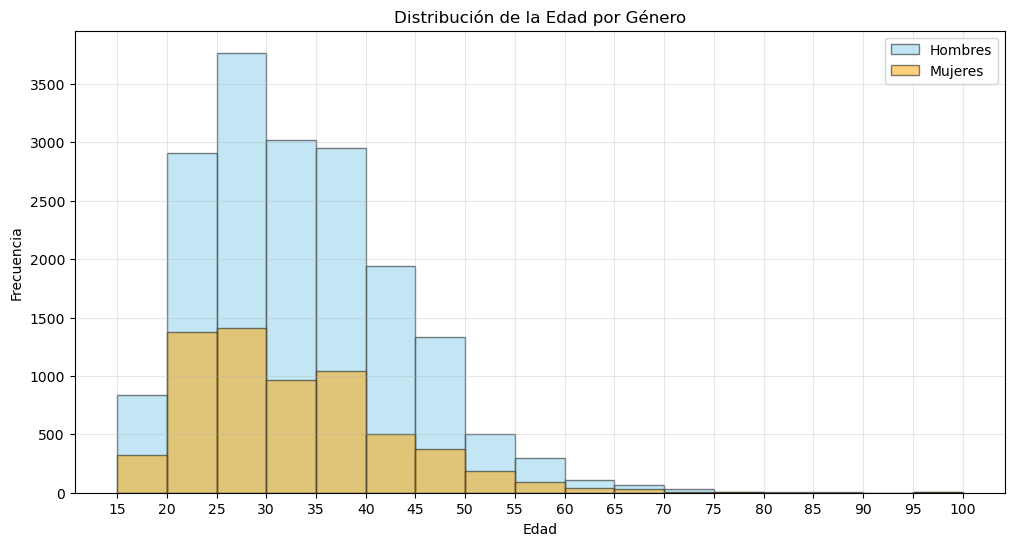

In [337]:

# Definir los bins para que sean intervalos de 5 en 5 años
bins = range(emifsurtot['edad'].min(), emifsurtot['edad'].max() + 5, 5)

# Crear histogramas de la distribución de edades por género
plt.figure(figsize=(12, 6))

emifsurtot[emifsurtot['sexo'] == 'Hombre']['edad'].plot(kind='hist', bins=bins, alpha=0.5, color='skyblue', label='Hombres', edgecolor='black')
emifsurtot[emifsurtot['sexo'] == 'Mujer']['edad'].plot(kind='hist', bins=bins, alpha=0.5, color='orange', label='Mujeres', edgecolor='black')

# Personalizar los xticks para mostrar intervalos de 5 en 5 años
plt.xticks(range(emifsurtot['edad'].min(), emifsurtot['edad'].max() + 5, 5))

plt.title('Distribución de la Edad por Género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Ajustar las líneas del grid para que sean más transparentes
plt.grid(True, alpha=0.3)  # Aquí ajustamos la transparencia del grid

plt.show()


In [341]:
# Calcular la media de la columna 'edad'
media_edad = emifsurtot['edad'].mean()
print(f"La media de edad es: {media_edad}")


La media de edad es: 32.668986371732736


In [342]:
# Calcular la cantidad de hombres y mujeres
conteo_sexo = emifsurtot['sexo'].value_counts()

# Calcular el porcentaje de cada género
porcentaje_sexo = conteo_sexo / conteo_sexo.sum() * 100

# Mostrar los resultados
print(porcentaje_sexo)


sexo
Hombre    73.658921
Mujer     26.341079
Name: count, dtype: float64


In [422]:
# Definir los bins de edad
bins = range(emifsurtot['edad'].min(), emifsurtot['edad'].max() + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]  # Crear etiquetas para los grupos de edad

# Crear una nueva columna en el DataFrame que categoriza las edades en los bins
emifsurtot['grupo_edad'] = pd.cut(emifsurtot['edad'], bins=bins, labels=labels, right=False)

# Calcular el porcentaje de filas en cada grupo de edad
porcentaje_grupos = emifsurtot['grupo_edad'].value_counts(normalize=True) * 100

# Obtener la edad mínima y máxima
edad_minima = emifsurtot['edad'].min()
edad_maxima = emifsurtot['edad'].max()

# Mostrar resultados
print("Porcentaje de filas en cada grupo de edad:")
print(porcentaje_grupos)
print(f"\nEdad mínima: {edad_minima}")
print(f"Edad máxima: {edad_maxima}")


Porcentaje de filas en cada grupo de edad:
grupo_edad
25-29    21.453130
20-24    17.741601
35-39    16.536183
30-34    16.515472
40-44    10.127998
45-49     7.058531
15-19     4.817530
50-54     2.849923
55-59     1.632078
60-64     0.613065
65-69     0.405948
70-74     0.153266
75-79     0.033139
95-99     0.033139
80-84     0.016569
85-89     0.012427
90-94     0.000000
Name: proportion, dtype: float64

Edad mínima: 15
Edad máxima: 99


### Medios de transporte utilizados a lo largo del trayecto migratorio ......cificado
pecificado


In [375]:
import unidecode

# Función para quitar acentos de un DataFrame
def quitar_acentos(df):
    # Eliminar acentos de los nombres de las columnas
    df.columns = [unidecode.unidecode(col) for col in df.columns]
    # Eliminar acentos de las celdas en el DataFrame
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].apply(lambda x: unidecode.unidecode(x) if isinstance(x, str) else x)
    return df

# Aplicamos la función a todos los DataFrames relevantes
df_unido = quitar_acentos(df_unido)
sub_df = quitar_acentos(sub_df)
sub_df_p19 = quitar_acentos(sub_df_p19)
sub_df_p9 = quitar_acentos(sub_df_p9)
sub_df_p10 = quitar_acentos(sub_df_p10)
sub_df_p23_renombrado = quitar_acentos(sub_df_p23_renombrado)
sub_df_p21_renombrado = quitar_acentos(sub_df_p21_renombrado)


C:\Users\puria\AppData\Local\Temp\ipykernel_1568\2812550332.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\2812550332.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\2812550332.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [376]:
# Unificar todas las columnas mapeadas en un solo DataFrame
todos_medios = pd.concat([sub_df['p30_mapeado'], sub_df['p15_mapeado'], sub_df_p19['p19_mapeado'], sub_df_p9['p9_mapeado'], sub_df_p10['p10_mapeado']], axis=0, ignore_index=True)

# Contar la cantidad de veces que se menciona cada medio de transporte
conteo_medios = todos_medios.value_counts().reset_index()
conteo_medios.columns = ['medio', 'conteo']

# Mostrar el DataFrame con el conteo
print(conteo_medios)


                                            medio  conteo
0                   Ninguno (caminando o nadando)   17136
1     Balsas (camaras de llanta, tambos, maderos)    4726
2                             Autobus o camioneta    1906
3                      Triciclo/Tuc Tuc/Bicicleta     443
4                     Triciclo/Tuc Tuc /Bicicleta     221
5                           Automovil/Motocicleta     104
6                            Automovil particular      78
7                            Abandono la encuesta      72
8                  Lancha o embarcacion en el mar      70
9               No entro a Mexico desde Guatemala      64
10                      Trailer o camion de carga      31
11                                        No sabe      16
12                                           Otro      12
13                                No especificado      12
14           Lancha o embarcacion en el mar o rio      10
15  Cuando entro a Mexico fue por avion o por mar       9
16            

In [377]:
# Función para contar el número de veces que se utiliza cada medio
def contar_medios_si_no(df, medios):
    conteos = {}
    for medio in medios:
        conteos[medio] = df[medio].str.lower().value_counts().get('si', 0)  # Contar los 'si'
    return pd.Series(conteos)

# Medios a contar en las columnas de tipo "Sí/No"
medios_si_no = ['autobus o camioneta', 'ferrocarril', 'trailer o camion de carga', 'automovil o motocicleta', 'avion', 'otro']

# Contar los medios en sub_df_p23_renombrado y sub_df_p21_renombrado
conteo_p23 = contar_medios_si_no(sub_df_p23_renombrado, medios_si_no)
conteo_p21 = contar_medios_si_no(sub_df_p21_renombrado, medios_si_no)

# Convertir los resultados a un DataFrame
conteo_si_no_df = pd.DataFrame([conteo_p23, conteo_p21]).sum().reset_index()
conteo_si_no_df.columns = ['medio', 'conteo']

# Unificar todos los conteos en un solo DataFrame
conteo_total = pd.concat([conteo_medios, conteo_si_no_df], axis=0, ignore_index=True)

# Mostrar el DataFrame final con todos los conteos
print(conteo_total)


                                            medio  conteo
0                   Ninguno (caminando o nadando)   17136
1     Balsas (camaras de llanta, tambos, maderos)    4726
2                             Autobus o camioneta    1906
3                      Triciclo/Tuc Tuc/Bicicleta     443
4                     Triciclo/Tuc Tuc /Bicicleta     221
5                           Automovil/Motocicleta     104
6                            Automovil particular      78
7                            Abandono la encuesta      72
8                  Lancha o embarcacion en el mar      70
9               No entro a Mexico desde Guatemala      64
10                      Trailer o camion de carga      31
11                                        No sabe      16
12                                           Otro      12
13                                No especificado      12
14           Lancha o embarcacion en el mar o rio      10
15  Cuando entro a Mexico fue por avion o por mar       9
16            

In [385]:
# Crear un diccionario para mapear las agrupaciones
agrupacion = {
    'No sabe': 'No Especificado',
    'Otro': 'No Especificado',
    'No especificado': 'No Especificado',
    'No responde': 'No Especificado',
    'otro': 'No Especificado',
    'Lancha o embarcacion en el mar o rio': 'Lancha o embarcacion en el mar o rio',
    'Balsas (camaras de llanta, tambos, maderos)': 'Lancha o embarcacion en el mar o rio',
    'Lancha o embarcacion en el mar': 'Lancha o embarcacion en el mar o rio',
    'Lancha o embarcacion en el rio': 'Lancha o embarcacion en el mar o rio',
    'Autobus o camioneta': 'Autobus o camioneta',
    'autobus o camioneta': 'Autobus o camioneta',
    'Automovil/Motocicleta': 'Automovil particular',
    'Automovil particular': 'Automovil particular',
    'Trailer o camion de carga': 'Trailer o camion de carga',
    'Triciclo/Tuc Tuc/Bicicleta': 'Triciclo/Tuc Tuc /Bicicleta',
    'Ninguno (caminando o nadando)': 'Ninguno (caminando o nadando)'
}

# Mapear las agrupaciones en el DataFrame
conteo_total['medio_agrupado'] = conteo_total['medio'].map(agrupacion)

# Agrupar por el nuevo concepto unificado y sumar los conteos
conteo_agrupado = conteo_total.groupby('medio_agrupado')['conteo'].sum().reset_index()

# Mostrar el DataFrame agrupado
print(conteo_agrupado)


                         medio_agrupado  conteo
0                   Autobus o camioneta    4383
1                  Automovil particular     182
2  Lancha o embarcacion en el mar o rio    4810
3         Ninguno (caminando o nadando)   17136
4                       No Especificado      59
5             Trailer o camion de carga      31
6           Triciclo/Tuc Tuc /Bicicleta     443


In [386]:
# Calcular el porcentaje del total para cada medio
conteo_agrupado['porcentaje'] = (conteo_agrupado['conteo'] / conteo_agrupado['conteo'].sum()) * 100

# Mostrar el DataFrame con el porcentaje incluido
print(conteo_agrupado)


                         medio_agrupado  conteo  porcentaje
0                   Autobus o camioneta    4383   16.206922
1                  Automovil particular     182    0.672977
2  Lancha o embarcacion en el mar o rio    4810   17.785830
3         Ninguno (caminando o nadando)   17136   63.363408
4                       No Especificado      59    0.218163
5             Trailer o camion de carga      31    0.114628
6           Triciclo/Tuc Tuc /Bicicleta     443    1.638071


In [380]:
##solo las que son de transitaar por mexico

# Función para quitar acentos de un DataFrame
def quitar_acentos(df):
    # Eliminar acentos de los nombres de las columnas
    df.columns = [unidecode.unidecode(col) for col in df.columns]
    # Eliminar acentos de las celdas en el DataFrame
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].apply(lambda x: unidecode.unidecode(x) if isinstance(x, str) else x)
    return df

# Aplicamos la función a los DataFrames relevantes
sub_df_p23_renombrado = quitar_acentos(sub_df_p23_renombrado)
sub_df_p21_renombrado = quitar_acentos(sub_df_p21_renombrado)


In [381]:
# Lista de columnas a contar
medios_transporte = ['autobus o camioneta', 'ferrocarril', 'trailer o camion de carga', 
                     'automovil o motocicleta', 'avion', 'otro']

# Función para contar el número de veces que se utiliza cada medio (donde se indica "si")
def contar_medios_si_no(df, medios):
    conteos = {}
    for medio in medios:
        conteos[medio] = df[medio].str.lower().value_counts().get('si', 0)  # Contar los 'si'
    return pd.Series(conteos)

# Contar los medios en sub_df_p23_renombrado y sub_df_p21_renombrado
conteo_p23 = contar_medios_si_no(sub_df_p23_renombrado, medios_transporte)
conteo_p21 = contar_medios_si_no(sub_df_p21_renombrado, medios_transporte)

# Unir los resultados y sumar los conteos
conteo_total_si_no = pd.DataFrame([conteo_p23, conteo_p21]).sum().reset_index()
conteo_total_si_no.columns = ['medio', 'conteo']

# Mostrar el DataFrame con el conteo total
print(conteo_total_si_no)


                       medio  conteo
0        autobus o camioneta    2477
1                ferrocarril     131
2  trailer o camion de carga     208
3    automovil o motocicleta     276
4                      avion      14
5                       otro      15


In [420]:
sub_df_p23_renombrado
sub_df_p21_renombrado

,autobus o camioneta,ferrocarril,trailer o camion de carga,automovil o motocicleta,avion,otro
0,Si,No,Si,No,No,No
1,Si,No,No,Si,No,No
2,Si,No,No,No,No,No
3,Si,No,No,No,No,No
4,Si,No,Si,No,No,No
...,...,...,...,...,...,...
2213,Si,No,No,No,No,No
2214,Si,No,No,No,No,No
2215,Si,No,No,No,No,No
2216,Si,No,No,No,No,No


In [394]:
# Unir los DataFrames
df_combinado = pd.concat([sub_df_p23_renombrado, sub_df_p21_renombrado], ignore_index=True)


In [395]:
# Contar cuántas veces se menciona "Sí" en cada columna
conteo_si = df_combinado.apply(lambda col: col.str.lower().value_counts().get('si', 0))


In [396]:
# Calcular el total de filas en el DataFrame combinado
total_filas = len(df_combinado)

# Calcular el porcentaje promedio de uso de cada medio
porcentaje_promedio = (conteo_si / total_filas) * 100

# Crear un DataFrame con los resultados
resultado_final = porcentaje_promedio.reset_index()
resultado_final.columns = ['medio', 'porcentaje']

# Mostrar el DataFrame con los porcentajes promedio
print(resultado_final)


                       medio  porcentaje
0        autobus o camioneta   82.649316
1                ferrocarril    4.371038
2  trailer o camion de carga    6.940274
3    automovil o motocicleta    9.209209
4                      avion    0.467134
5                       otro    0.500501


In [419]:
distribucion_valores1 = df_combinado['ferrocarril'].value_counts(normalize=True) * 100
print(distribucion_valores1)


ferrocarril
No                      93.193193
Si                       4.371038
Abandono la encuesta     2.402402
No responde              0.033367
Name: proportion, dtype: float64


### 20. En este viaje, ¿contrató alguna persona (coyote, pollero, guía, etc.) para que le guiara en su tránsito por México?

Flujo de Migrantes Procedentes de México

1	Sí
2	No
97	No sabe
98	No responde
99	No especificado

cado
ecificado
 

In [403]:
df_unido4.head()

,folio,trim,unidad,region,ciudad,punto,turno,sexo,edad,nacio,cruzar,trabajar,estuvo,p1,p1_1,p1_2,p1_2_1,p1_2_2_1,p1_2_2_2,p1_3,p2,p2_1,p3a,p3n,p4,p4_1,p5,p6,p6_1,p7,p7_1_1,p7_1_2,p7_1_3,p7_2,p7_3,p8,p8_1d,p8_1m,p8_1u,p8_1_1,p8_2e,p8_2m,p8_2l,p8_2u,p9,p9_1,p9_2,p9_2_1,p9_4,p9_5,p9_6_1,p9_6_2,p9_6_3,p9_6_4,p9_6_5,p9_6_6,p9_6_7,p9_7,p9_8,p9_9c,p9_9u,p9_9t,p9_10,p9_11,p9_11_1_1,p9_11_1_2,p9_12,p9_13,p9_14,p9_15_1,p9_15_2,p10,p11,p12,p13,p13_1,p13_2,p14,p14_1,p14_2,p15,p16,p16_1,p16_2,p16_3,p16_4,p17,p17_1f,p17_1p,p17_1u,p17_2e,p17_2m,p17_3,p18,p18_1,p18_2,p18_2_1,p18_2_2c,p18_2_2t,p19c,p19t,p20,p20_1c,p20_1t,p20_2,p21,p21_1c,p21_1t,p22c,p22t,p23,p24m,p24a,p25_1,p25_1_1,p25_2,p25_2_1,p25_3,p25_3_1,p26,p26_1,p26_2,p27,p28,p28_1f,p28_1p,p28_1u,p28_2e,p28_2m,p28_4,p28_5,p28_6,p28_7_1,p28_7_2,p28_7_3,p28_7_4,p28_7_5,p28_7_6,p28_7_7,p28_8,p28_9,p28_10c,p28_10u,p28_10t,p28_10_1,p28_11,p28_12,p29,p30,p31,filtro,estrato,upm,ponfin3,Source,trimestre,nivel,oficio_mx,p10_mapeado
0,8809,3.0,12209,1,3,3,2,1,28,1,1,1,-4,1,-5,-5,-5,-5,-5,-5,2,2,6,1,1,2,6,2,2,5,2,3,0,2,2,1,13,1312,1,1,-13,-13,-13,-13,1,-14,2,4,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,2,-18,-18,1,2,2,1,96,0,1312047,1,2,-20,-20,2,-22,1,2,4,-24,-24,-24,-24,1,999999999,-26,99,7,7034,2,1,1,2,-29,-29,-29,999,99,997,999,99,99,2,999,99,999,99,9999,99,9999,2,-37,2,-38,2,-39,2,-40,-40,1,1,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,,3032,3032012209,8.463800,PGT1,NaN,NaN,NaN,Ninguno (caminando o nadando)
1,108607,3.0,182207,1,3,3,3,1,29,1,1,1,-4,1,-5,-5,-5,-5,-5,-5,2,2,6,1,1,2,1,1,-9,2,99,99,99,1,1,1,13,1312,1,1,-13,-13,-13,-13,1,-14,2,8,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,2,-18,-18,1,2,2,2,1,3,1312047,1,2,-20,-20,2,-22,2,2,4,-24,-24,-24,-24,2,-27,70340001,2,7,7034,2,1,1,2,-29,-29,-29,999,99,1,-32,-32,-32,-32,-32,-32,-32,-32,-32,2,2022,2,-37,2,-38,2,-39,2,-40,-40,2,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,-41,2,-45,2,,3033,3033182207,42.509212,PGT1,NaN,NaN,NaN,Autobús o camioneta
2,111709,3.0,52209,1,3,2,2,1,47,1,1,1,-4,1,-5,-5,-5,-5,-5,-5,2,2,5,1,1,2,1,1,-9,5,3,2,0,1,1,1,13,1312,1,1,-13,-13,-13,-13,1,-14,2,4,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,2,-18,-18,1,2,2,1,96,0,1312047,1,2,-20,-20,2,-22,1,2,4,-24,-24,-24,-24,1,70340047,-26,1,7,7034,2,1,1,2,-29,-29,-29,999,99,997,999,99,99,97,999,99,997,97,9999,99,9999,2,-37,2,-38,2,-39,2,-40,-40,1,1,70340047,-43,1,7,7034,999,2,2,2,2,2,2,2,2,2,8,6,160,1,2,1,999,2,2,-45,2,,3022,3022052209,64.873551,PGT1,NaN,NaN,NaN,Ninguno (caminando o nadando)
3,174407,3.0,202207,1,3,3,3,1,40,1,1,1,-4,1,-5,-5,-5,-5,-5,-5,2,2,6,1,1,2,6,1,-9,1,-10,-10,-10,-10,-10,1,13,1304,99,1,-13,-13,-13,-13,1,-14,2,3,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,2,-18,-18,2,2,2,2,96,0,1312047,6,2,-20,-20,2,-22,98,1,5,1,1,2,6,-25,-25,-25,-25,-25,-25,1,2,-28,-28,-28,-28,-28,999,99,0,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,2,-45,1,,3033,3033202207,52.484115,PGT1,NaN,NaN,NaN,Ninguno (caminando o nadando)
4,547808,3.0,192208,1,3,3,2,1,45,1,1,1,-4,1,-5,-5,-5,-5,-5,-5,1,1,4,1,1,2,1,1,-9,5,2,3,0,2,1,1,13,1304,1,1,-13,-13,-13,-13,1,-14,2,3,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,1,8,96,2,2,2,1,96,0,1312047,1,2,-20,-20,2,-22,2,1,4,-24,-24,-24,-24,2,-27,70190001,2,7,7019,1,1,2,2,-29,-29,-29,999,99,0,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,-31,2,-45,2,,3032,3032192208,4.727660,PGT1,NaN,NaN,NaN,Ninguno (caminando o nadando)


df_unido['p17','p18_0_1', 'p18_0_2	p18_0_3	p18_0_4	p18_0_5	p18_1	p18_2 p24_0_1	p24_0_2	p24_0_3	p24_0_4 p25	p25_1_1	p25_1_2	p25_1_3	p25_1_4	p25_1_5	p25_1_6	p25_1_7	p25_1_8	p25_2	]

df_unido2[p20,p23_0_1	p23_0_2	p23_0_3	p23_0_4	p23_0_5	p23_1	p23_2	p25_0_1	p25_0_2	p25_0_3	p25_0_4	p26	p26_1_1	p26_1_2	p26_1_3	p26_1_4	p26_1_5	p26_1_6	p26_1_7	p26_2]

df_unido3[p12,p29_3, p19_0_1	p19_0_2	p19_0_3	p19_0_4	]

df_unido4[p16_2]


In [404]:
# Lista de columnas que deseas incluir en el subdataframe
columnas_seleccionadas = [
    'p17', 'p18_0_1', 'p18_0_2', 'p18_0_3', 'p18_0_4', 'p18_0_5', 
    'p18_1', 'p18_2', 'p24_0_1', 'p24_0_2', 'p24_0_3', 'p24_0_4', 
    'p25', 'p25_1_1', 'p25_1_2', 'p25_1_3', 'p25_1_4', 'p25_1_5', 
    'p25_1_6', 'p25_1_7', 'p25_1_8', 'p25_2'
]

# Crear el subdataframe con las columnas seleccionadas
sub_df1 = df_unido[columnas_seleccionadas]

# Mostrar las primeras filas del subdataframe para verificar
sub_df1.head()


,p17,p18_0_1,p18_0_2,p18_0_3,p18_0_4,p18_0_5,p18_1,p18_2,p24_0_1,p24_0_2,p24_0_3,p24_0_4,p25,p25_1_1,p25_1_2,p25_1_3,p25_1_4,p25_1_5,p25_1_6,p25_1_7,p25_1_8,p25_2
0,2,1,2,2,2,2,-22,-22,1,1,1,1,2,-25,-25,-25,-25,-25,-25,-25,-25,-25
1,1,2,2,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25
2,2,2,1,2,2,1,-22,-22,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998
3,1,1,1,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25
4,1,1,1,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25


In [405]:
# Lista de columnas que deseas incluir en el subdataframe
columnas_seleccionadas_2 = [
    'p20', 'p23_0_1', 'p23_0_2', 'p23_0_3', 'p23_0_4', 'p23_0_5', 
    'p23_1', 'p23_2', 'p25_0_1', 'p25_0_2', 'p25_0_3', 'p25_0_4', 
    'p26', 'p26_1_1', 'p26_1_2', 'p26_1_3', 'p26_1_4', 'p26_1_5', 
    'p26_1_6', 'p26_1_7', 'p26_2'
]

# Crear el subdataframe con las columnas seleccionadas
sub_df_2 = df_unido2[columnas_seleccionadas_2]

# Mostrar las primeras filas del subdataframe para verificar
sub_df_2.head()


,p20,p23_0_1,p23_0_2,p23_0_3,p23_0_4,p23_0_5,p23_1,p23_2,p25_0_1,p25_0_2,p25_0_3,p25_0_4,p26,p26_1_1,p26_1_2,p26_1_3,p26_1_4,p26_1_5,p26_1_6,p26_1_7,p26_2
0,2,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22
1,2,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22
2,2,1,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22
3,2,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22
4,2,1,1,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22


In [406]:
# Lista de columnas que deseas incluir en el subdataframe de df_unido3
columnas_seleccionadas_3 = [
    'p12', 'p29_3', 'p19_0_1', 'p19_0_2', 'p19_0_3', 'p19_0_4'
]

# Crear el subdataframe con las columnas seleccionadas
sub_df_3 = df_unido3[columnas_seleccionadas_3]

# Mostrar las primeras filas del subdataframe para verificar
sub_df_3.head()


,p12,p29_3,p19_0_1,p19_0_2,p19_0_3,p19_0_4
0,2,-998,-998,-998,-998,-998
1,2,-51,2,2,2,2
2,2,-51,2,2,2,2
3,2,-51,2,2,2,2
4,2,-998,-998,-998,-998,-998


In [407]:
# Lista de columnas que deseas incluir en el subdataframe de df_unido4
columnas_seleccionadas_4 = ['p16_2']

# Crear el subdataframe con las columnas seleccionadas
sub_df_4 = df_unido4[columnas_seleccionadas_4]

# Mostrar las primeras filas del subdataframe para verificar
sub_df_4.head()


,p16_2
0,-24
1,-24
2,-24
3,1
4,-24


In [408]:
# Diccionario de mapeo para los valores de las celdas
mapping_coyote = {
    1: 'Sí',
    2: 'No',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
}


In [411]:
# Mapear y renombrar columnas en sub_df1
sub_df1['coyote'] = sub_df1['p17'].map(mapping_coyote)

# Mapear y renombrar columnas en sub_df2
sub_df_2['coyote'] = sub_df_2['p20'].map(mapping_coyote)

# Mapear y renombrar columnas en sub_df3
sub_df3_1 = sub_df_3['p12'].map(mapping_coyote).rename('coyote')
sub_df3_2 = sub_df_3['p29_3'].map(mapping_coyote).rename('coyote')

# Mapear y renombrar columnas en sub_df4
sub_df_4['coyote'] = sub_df_4['p16_2'].map(mapping_coyote)



C:\Users\puria\AppData\Local\Temp\ipykernel_1568\54805493.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\54805493.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\puria\AppData\Local\Temp\ipykernel_1568\54805493.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [413]:
# Concatenar las columnas 'coyote' de todos los DataFrames
df_concatenado = pd.concat([
    sub_df1[['coyote']].dropna(), 
    sub_df_2[['coyote']].dropna(),
    sub_df3_1.dropna(),
    sub_df3_2.dropna(),
    sub_df_4[['coyote']].dropna()
], ignore_index=True)

# Mostrar las primeras filas del DataFrame concatenado
df_concatenado.head()


,coyote,0
0,No,NaN
1,Sí,NaN
2,No,NaN
3,Sí,NaN
4,Sí,NaN


In [421]:
distribucion_valores = df_concatenado['coyote'].value_counts(normalize=True) * 100

print(distribucion_valores)


coyote
No                 73.810316
Sí                 25.990017
No especificado     0.083195
No responde         0.066556
No sabe             0.049917
Name: proportion, dtype: float64


In [437]:
sub_df1

,p17,p18_0_1,p18_0_2,p18_0_3,p18_0_4,p18_0_5,p18_1,p18_2,p24_0_1,p24_0_2,p24_0_3,p24_0_4,p25,p25_1_1,p25_1_2,p25_1_3,p25_1_4,p25_1_5,p25_1_6,p25_1_7,p25_1_8,p25_2,coyote
0,2,1,2,2,2,2,-22,-22,1,1,1,1,2,-25,-25,-25,-25,-25,-25,-25,-25,-25,No
1,1,2,2,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25,Sí
2,2,2,1,2,2,1,-22,-22,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,-998,No
3,1,1,1,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25,Sí
4,1,1,1,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1,2,2,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25,Sí
775,1,1,2,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25,Sí
776,1,2,2,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25,Sí
777,1,2,2,2,2,2,-22,-22,2,2,2,2,2,-25,-25,-25,-25,-25,-25,-25,-25,-25,Sí


In [443]:
sub_df_2

,p20,p23_0_1,p23_0_2,p23_0_3,p23_0_4,p23_0_5,p23_1,p23_2,p25_0_1,p25_0_2,p25_0_3,p25_0_4,p26,p26_1_1,p26_1_2,p26_1_3,p26_1_4,p26_1_5,p26_1_6,p26_1_7,p26_2,coyote
0,2,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22,No
1,2,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22,No
2,2,1,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22,No
3,2,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22,No
4,2,1,1,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,2,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22,No
2214,1,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22,Sí
2215,2,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22,No
2216,1,2,2,2,2,2,-20,-20,2,2,2,2,2,-22,-22,-22,-22,-22,-22,-22,-22,Sí


### 1. el % reporto haber ...

In [444]:
# Renombrar las columnas de sub_df1 que comienzan con 'p18_0'
sub_df1_renombrado = sub_df1.rename(columns=lambda x: 'sufrio_violencia' + x.split('_')[-1] if x.startswith('p18_0') else x)
# Renombrar las columnas de sub_df_2 que comienzan con 'p23_0'
sub_df_2_renombrado = sub_df_2.rename(columns=lambda x: 'sufrio_violencia' + x.split('_')[-1] if x.startswith('p23_0') else x)
# Seleccionar solo las columnas que fueron renombradas
sub_df1_sufrio_violencia = sub_df1_renombrado.filter(regex='^sufrio_violencia')
sub_df_2_sufrio_violencia = sub_df_2_renombrado.filter(regex='^sufrio_violencia')
# Concatenar las dos tablas en una sola
df_concatenado1 = pd.concat([sub_df1_sufrio_violencia, sub_df_2_sufrio_violencia], ignore_index=True)



In [448]:
# Diccionario de mapeo
mapping_sufrio_violencia = {
    1: 'Sí',
    2: 'No'
}

# Aplicar el mapeo en el DataFrame
df_concatenado1_mapeado = df_concatenado1.applymap(lambda x: mapping_sufrio_violencia.get(x, x))

# Contar el número de "Sí" en cada fila
df_concatenado1_mapeado['count_sí'] = df_concatenado1_mapeado.apply(lambda row: row.str.count('Sí').sum(), axis=1)

# Calcular el total de filas
total_filas = len(df_concatenado1_mapeado)

# Calcular el porcentaje de filas con al menos un "Sí"
porcentaje_al_menos_un_si = (df_concatenado1_mapeado['count_sí'] > 0).sum() / total_filas * 100

# Calcular el porcentaje de filas con exactamente 2 "Sí"
porcentaje_exactamente_dos_si = (df_concatenado1_mapeado['count_sí'] >= 2).sum() / total_filas * 100

# Calcular el porcentaje de filas con 3 o más "Sí"
#porcentaje_tres_o_mas_si = (df_concatenado1_mapeado['count_sí'] >= 3).sum() / total_filas * 100

# Mostrar los resultados
print(f"Porcentaje de filas con al menos un 'Sí': {porcentaje_al_menos_un_si:.2f}%")
print(f"Porcentaje de filas con dos o mas 'Sí': {porcentaje_exactamente_dos_si:.2f}%")
#print(f"Porcentaje de filas con tres o más 'Sí': {porcentaje_tres_o_mas_si:.2f}%")


C:\Users\puria\AppData\Local\Temp\ipykernel_1568\1772436787.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Porcentaje de filas con al menos un 'Sí': 46.38%
Porcentaje de filas con dos o mas 'Sí': 19.72%


In [451]:
df_concatenado1_mapeado

,sufrio_violencia1,sufrio_violencia2,sufrio_violencia3,sufrio_violencia4,sufrio_violencia5,count_sí
0,Sí,No,No,No,No,1.0
1,No,No,No,No,No,0.0
2,No,Sí,No,No,Sí,2.0
3,Sí,Sí,No,No,No,2.0
4,Sí,Sí,No,No,No,2.0
...,...,...,...,...,...,...
2992,No,No,No,No,No,0.0
2993,No,No,No,No,No,0.0
2994,No,No,No,No,No,0.0
2995,No,No,No,No,No,0.0


### si extorciones y violencia..

In [450]:
# Filtrar las columnas 3, 4 y 5
df_subset = df_concatenado1_mapeado[['sufrio_violencia3', 'sufrio_violencia4', 'sufrio_violencia5']]

# Calcular cuántas filas tienen al menos un "Sí"
count_at_least_one_si = (df_subset == 'Sí').any(axis=1).sum()

# Calcular el total de filas
total_filas = len(df_subset)

# Calcular el porcentaje
porcentaje_al_menos_un_si = (count_at_least_one_si / total_filas) * 100

# Mostrar el resultado
print(f"Porcentaje de filas con al menos un 'Sí' en columnas 3, 4 y 5: {porcentaje_al_menos_un_si:.2f}%")


Porcentaje de filas con al menos un 'Sí' en columnas 3, 4 y 5: 2.67%


In [460]:
# Renombrar las columnas en sub_df1
sub_df1_renombrado = sub_df1.rename(columns={
    'p18_1': 'tuvo_prob',
    'p18_2': 'denuncio'
})

# Renombrar las columnas en sub_df_2
sub_df_2_renombrado = sub_df_2.rename(columns={
    'p23_1': 'tuvo_prob',
    'p23_2': 'denuncio'
})
# Seleccionar las columnas renombradas
sub_df1_selected = sub_df1_renombrado[['tuvo_prob', 'denuncio']]
sub_df_2_selected = sub_df_2_renombrado[['tuvo_prob', 'denuncio']]

# Concatenar los subdataframes
df_concatenado_final = pd.concat([sub_df1_selected, sub_df_2_selected], ignore_index=True)

# Mostrar el resultado
df_concatenado_final.head()


,tuvo_prob,denuncio
0,-22,-22
1,-22,-22
2,-22,-22
3,-22,-22
4,-22,-22


In [461]:
# Diccionario de mapeo para la primera columna
mapping_col1 = {
    -998: 'Abandonó la encuesta',
    -20: 'Problema_no_extorsion',  # Shortname para "Tuvo algún tipo de problema en su viaje por México..."
    -22: 'Problema_no_extorsion',
    1: 'Policía',
    2: 'Militares/Soldados/Ejército/Marina',
    3: 'Guardia Nacional (GN)',
    4: 'Autoridades o funcionarios de migración',
    5: 'Guías, coyotes o polleros',
    6: 'Pandillas o bandas criminales',
    7: 'Otros migrantes',
    8: 'Otro',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
}

# Diccionario de mapeo para la segunda columna
mapping_col2 = {
    -20: 'Problema_no_extorsion',
    -22: 'Problema_no_extorsion',
    -998: 'Abandonó la encuesta',
    1: 'Sí',
    2: 'No',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
}

df_concatenado_final['tuvo_prob'] = df_concatenado_final['tuvo_prob'].map(mapping_col1)

df_concatenado_final['denuncio'] = df_concatenado_final['denuncio'].map(mapping_col2)



In [462]:
df_concatenado_final.head(60)

,tuvo_prob,denuncio
0,Problema_no_extorsion,Problema_no_extorsion
1,Problema_no_extorsion,Problema_no_extorsion
2,Problema_no_extorsion,Problema_no_extorsion
3,Problema_no_extorsion,Problema_no_extorsion
4,Problema_no_extorsion,Problema_no_extorsion
5,Problema_no_extorsion,Problema_no_extorsion
6,Problema_no_extorsion,Problema_no_extorsion
7,Problema_no_extorsion,Problema_no_extorsion
8,Problema_no_extorsion,Problema_no_extorsion
9,Problema_no_extorsion,Problema_no_extorsion


In [463]:
# Distribución de valores en 'tuvo_prob'
distribucion_tuvo_prob = df_concatenado_final['tuvo_prob'].value_counts(normalize=True) * 100

# Distribución de valores en 'denuncio'
distribucion_denuncio = df_concatenado_final['denuncio'].value_counts(normalize=True) * 100

# Mostrar las distribuciones
print("Distribución de valores en 'tuvo_prob':")
print(distribucion_tuvo_prob)
print("\nDistribución de valores en 'denuncio':")
print(distribucion_denuncio)


Distribución de valores en 'tuvo_prob':
tuvo_prob
Problema_no_extorsion                      94.594595
Abandonó la encuesta                        3.336670
Pandillas o bandas criminales               0.867534
Policía                                     0.467134
Otros migrantes                             0.266934
Guías, coyotes o polleros                   0.133467
Autoridades o funcionarios de migración     0.133467
Militares/Soldados/Ejército/Marina          0.100100
No sabe                                     0.033367
Otro                                        0.033367
Guardia Nacional (GN)                       0.033367
Name: proportion, dtype: float64

Distribución de valores en 'denuncio':
denuncio
Problema_no_extorsion    94.594595
Abandonó la encuesta      3.336670
No                        2.002002
Sí                        0.066733
Name: proportion, dtype: float64


In [464]:
# Lista de valores de interés en 'tuvo_prob'
valores_interes = [
    'Pandillas o bandas criminales',
    'Policía',
    'Otros migrantes',
    'Guías, coyotes o polleros',
    'Autoridades o funcionarios de migración',
    'Militares/Soldados/Ejército/Marina',
    'No sabe',
    'Otro',
    'Guardia Nacional (GN)'
]

# Filtrar el DataFrame para obtener solo las filas con esos valores
sub_df_filtrado = df_concatenado_final[df_concatenado_final['tuvo_prob'].isin(valores_interes)]

# Calcular la distribución de valores en 'tuvo_prob' para el subdataframe filtrado
distribucion_filtrado = sub_df_filtrado['tuvo_prob'].value_counts(normalize=True) * 100

# Mostrar la distribución
distribucion_filtrado


tuvo_prob
Pandillas o bandas criminales              41.935484
Policía                                    22.580645
Otros migrantes                            12.903226
Guías, coyotes o polleros                   6.451613
Autoridades o funcionarios de migración     6.451613
Militares/Soldados/Ejército/Marina          4.838710
No sabe                                     1.612903
Otro                                        1.612903
Guardia Nacional (GN)                       1.612903
Name: proportion, dtype: float64

In [466]:
sub_df_filtrado

,tuvo_prob,denuncio
10,"Guías, coyotes o polleros",No
24,Pandillas o bandas criminales,No
32,Pandillas o bandas criminales,No
58,Pandillas o bandas criminales,No
84,Policía,No
...,...,...
2739,Pandillas o bandas criminales,No
2773,Policía,No
2893,Otros migrantes,No
2928,Pandillas o bandas criminales,No


In [468]:
# Calcular la distribución de valores en 'denuncio' para el subdataframe filtrado
distribucion_denuncio_filtrado = sub_df_filtrado['denuncio'].value_counts(normalize=True) * 100

# Mostrar la distribución
distribucion_denuncio_filtrado


denuncio
No    96.774194
Sí     3.225806
Name: proportion, dtype: float64

In [470]:
# Convertir los colores RGBA de strings a tuplas
colors_tuples = [
    (102/255, 197/255, 204/255, 0.8),
    (246/255, 207/255, 113/255, 0.8),
    (248/255, 156/255, 116/255, 0.8),
    (220/255, 176/255, 242/255, 0.8),
    (135/255, 197/255, 95/255, 0.8),
    (158/255, 185/255, 243/255, 0.8),
    (254/255, 136/255, 177/255, 0.8),
    (201/255, 219/255, 116/255, 0.8),
    (139/255, 224/255, 164/255, 0.8),
    (180/255, 151/255, 231/255, 0.8)
]


C:\Users\puria\AppData\Local\Temp\ipykernel_1568\146060406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



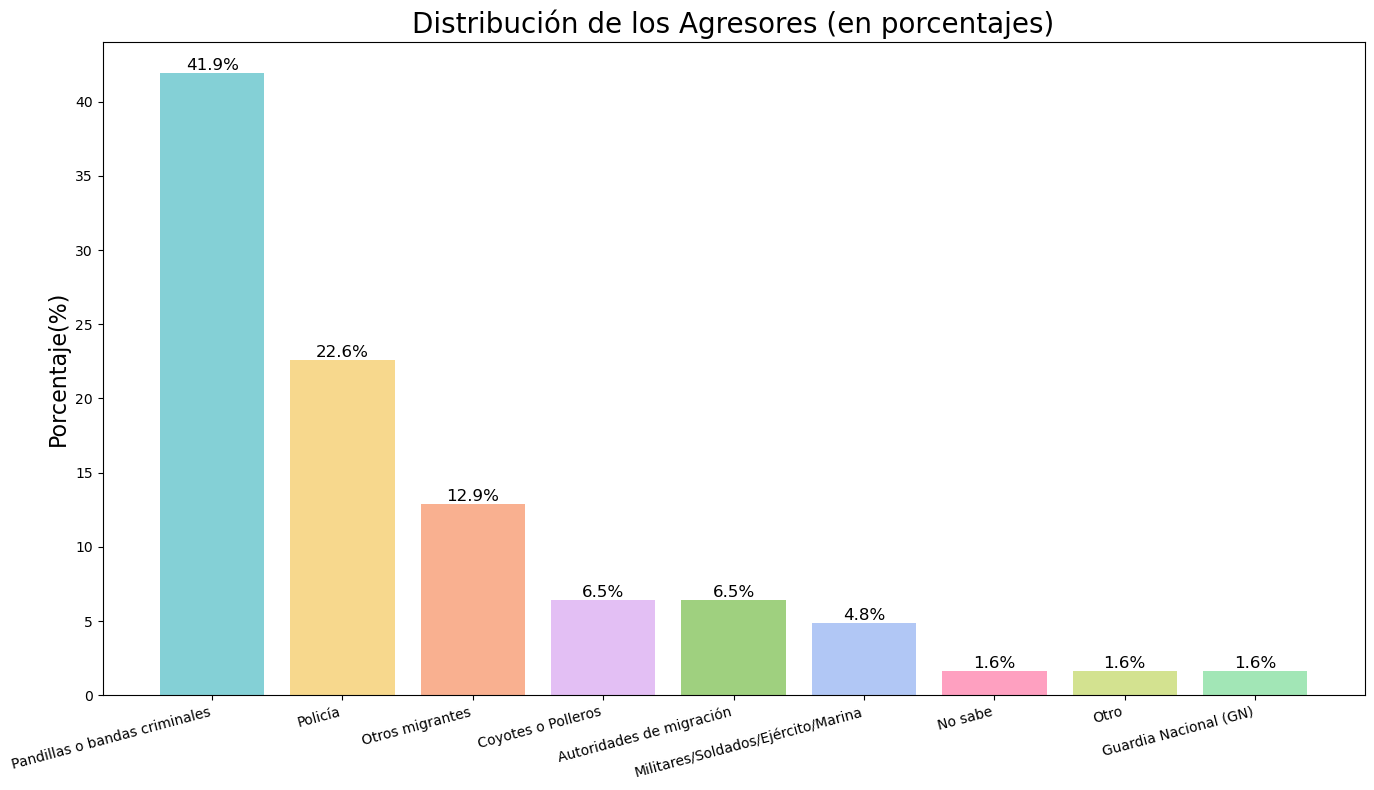

In [478]:
import matplotlib.pyplot as plt

# Cambiar los valores en la columna 'tuvo_prob'
sub_df_filtrado['tuvo_prob'] = sub_df_filtrado['tuvo_prob'].replace({
    'Guías, coyotes o polleros': 'Coyotes o Polleros',
    'Autoridades o funcionarios de migración': 'Autoridades de migración'
})

# Calcular los porcentajes para cada valor en 'tuvo_prob'
counts = sub_df_filtrado['tuvo_prob'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(counts.index, counts.values, color=colors_tuples[:len(counts)])

# Agregar título y etiquetas
plt.title('Distribución de los Agresores (en porcentajes)', fontsize=20)
plt.xlabel('', fontsize=16)
plt.ylabel('Porcentaje(%)', fontsize=16)

# Incluir etiquetas ligeramente inclinadas en el eje X
plt.xticks(rotation=15, ha='right')

# Agregar etiquetas en la parte superior de cada barra
for bar, value in zip(bars, counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()





In [483]:
# Crear el mapeo de valores
value_mapping = {
    -998: 'Abandonó la encuesta',
    1: 'Sí',
    2: 'No',
    97: 'No sabe',
    98: 'No responde',
    99: 'No especificado'
}

# Seleccionar y mapear las columnas de sub_df1
mapped_sub_df1 = sub_df1[['p24_0_1', 'p24_0_2', 'p24_0_3', 'p24_0_4']].replace(value_mapping)

# Seleccionar y mapear las columnas de sub_df_2
mapped_sub_df_2 = sub_df_2[['p25_0_1', 'p25_0_2', 'p25_0_3', 'p25_0_4']].replace(value_mapping)

# Renombrar las columnas para emparejarlas según sus terminaciones
mapped_sub_df1.columns = ['pregunta_1', 'pregunta_2', 'pregunta_3', 'pregunta_4']
mapped_sub_df_2.columns = ['pregunta_1', 'pregunta_2', 'pregunta_3', 'pregunta_4']

# Concatenar los dos dataframes
df_concatenado_final = pd.concat([mapped_sub_df1, mapped_sub_df_2], ignore_index=True)

# Mostrar el dataframe resultante
print(df_concatenado_final.head())


             pregunta_1            pregunta_2            pregunta_3  \
0                    Sí                    Sí                    Sí   
1                    No                    No                    No   
2  Abandonó la encuesta  Abandonó la encuesta  Abandonó la encuesta   
3                    No                    No                    No   
4                    No                    No                    No   

             pregunta_4  
0                    Sí  
1                    No  
2  Abandonó la encuesta  
3                    No  
4                    No  


In [485]:
# Filtrar filas para quedarse solo con las que tienen "Sí" o "No"
df_filtrado = df_concatenado_final[df_concatenado_final.apply(lambda row: all(val in ['Sí', 'No'] for val in row), axis=1)]

# Contar la cantidad de "Sí" en cada fila
df_filtrado['count_sí'] = df_filtrado.apply(lambda row: sum(row == 'Sí'), axis=1)

# Calcular el total de filas
total_filas_filtrado = len(df_filtrado)

# Calcular el porcentaje de filas con 1 "Sí"
porcentaje_1_sí = (df_filtrado['count_sí'] == 1).sum() / total_filas_filtrado * 100

# Calcular el porcentaje de filas con 2 "Sí"
porcentaje_2_sí = (df_filtrado['count_sí'] == 2).sum() / total_filas_filtrado * 100

# Calcular el porcentaje de filas con 3 o más "Sí"
porcentaje_3_o_más_sí = (df_filtrado['count_sí'] >= 3).sum() / total_filas_filtrado * 100

# Mostrar los resultados
print(f"Porcentaje de filas con 1 'Sí': {porcentaje_1_sí:.2f}%")
print(f"Porcentaje de filas con 2 'Sí': {porcentaje_2_sí:.2f}%")
print(f"Porcentaje de filas con 3 o más 'Sí': {porcentaje_3_o_más_sí:.2f}%")

print(f"Porcentaje de filas con 3 o más 'Sí': {porcentaje_3_o_más_sí:.2f}%")


Porcentaje de filas con 1 'Sí': 4.03%
Porcentaje de filas con 2 'Sí': 1.37%
Porcentaje de filas con 3 o más 'Sí': 0.81%
Porcentaje de filas con 3 o más 'Sí': 0.81%


C:\Users\puria\AppData\Local\Temp\ipykernel_1568\1302857244.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

